In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files


['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [15]:
combinedData=pd.DataFrame()

for file in csv_files:
    data=pd.read_csv(file)
    combinedData=pd.concat([combinedData, data], ignore_index=True)

combinedData.to_csv("us_census.csv", index=False)

In [16]:
#drop unnamed: 0 column
combinedData.drop(combinedData.columns[0], axis=1, inplace=True)
combinedData.to_csv("us_census.csv", index=False)
# DO NOT RUN THIS CODE

In [3]:
combinedData=pd.read_csv("us_census.csv")

In [4]:
#dtypes of the columns
combinedData.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [5]:
#head of the data
combinedData.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [6]:
combinedData['Hispanic']=combinedData['Hispanic'].str.replace('%','')
combinedData['Hispanic']=combinedData['Hispanic'].astype('float64')

combinedData['White']=combinedData['White'].str.replace('%','')
combinedData['White'] = combinedData['White'].astype('float64')

combinedData['Black']=combinedData['Black'].str.replace('%','')
combinedData['Black'] = combinedData['Black'].astype('float64')

combinedData['Native']=combinedData['Native'].str.replace('%','')
combinedData['Native'] = combinedData['Native'].astype('float64')

combinedData['Asian']=combinedData['Asian'].str.replace('%','')
combinedData['Asian'] = combinedData['Asian'].astype('float64')

combinedData['Pacific']=combinedData['Pacific'].str.replace('%','')
combinedData['Pacific'] = combinedData['Pacific'].astype('float64')

combinedData['Income']=combinedData['Income'].str.replace('$','')
combinedData['Income'] = combinedData['Income'].astype('float64')


In [9]:
combinedData[['MalePop', 'FemalePop']]=combinedData['GenderPop'].str.split('_', expand=True)

combinedData['MalePop']=combinedData['MalePop'].str.replace('M','')
combinedData['MalePop'] = combinedData['MalePop'].astype('int64')

combinedData['FemalePop']=combinedData['FemalePop'].str.replace('F','')
combinedData['FemalePop']=combinedData['FemalePop'].replace('', np.nan).astype(float).fillna(combinedData['TotalPop']-combinedData['MalePop'])
combinedData['FemalePop'] = combinedData['FemalePop'].astype('int64')

combinedData.drop(['GenderPop'], axis=1, inplace=True)

In [10]:
combinedData['FemalePop']

0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
6      2630239
7      1841615
8       478041
9       340810
10    10045763
11     5123362
12     5123362
13      696428
14      806083
15     6556862
16     3333382
17     1558931
18     1558931
19     1453125
20     2233145
21     2364097
22      679019
23     3057895
24     3057895
25     3455936
26     5038598
27     2727005
28     1536358
29     3081445
30     3081445
31      504536
32      939759
33     1390901
34      670717
35     4561386
36     4561386
37     1051703
38    10131373
39     5049925
40      353677
41     5913084
42     5913084
43     1942789
44     1990780
45     6534215
46     1869213
47      543273
48      543273
49     2455167
50      419713
51     3331859
52    13367298
53     1444150
54     1444150
55      318031
56     4195682
57     3497739
58      937789
59     2890732
Name: FemalePop, dtype: int64

In [11]:
combinedData.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [12]:
combinedData.drop_duplicates(inplace=True)

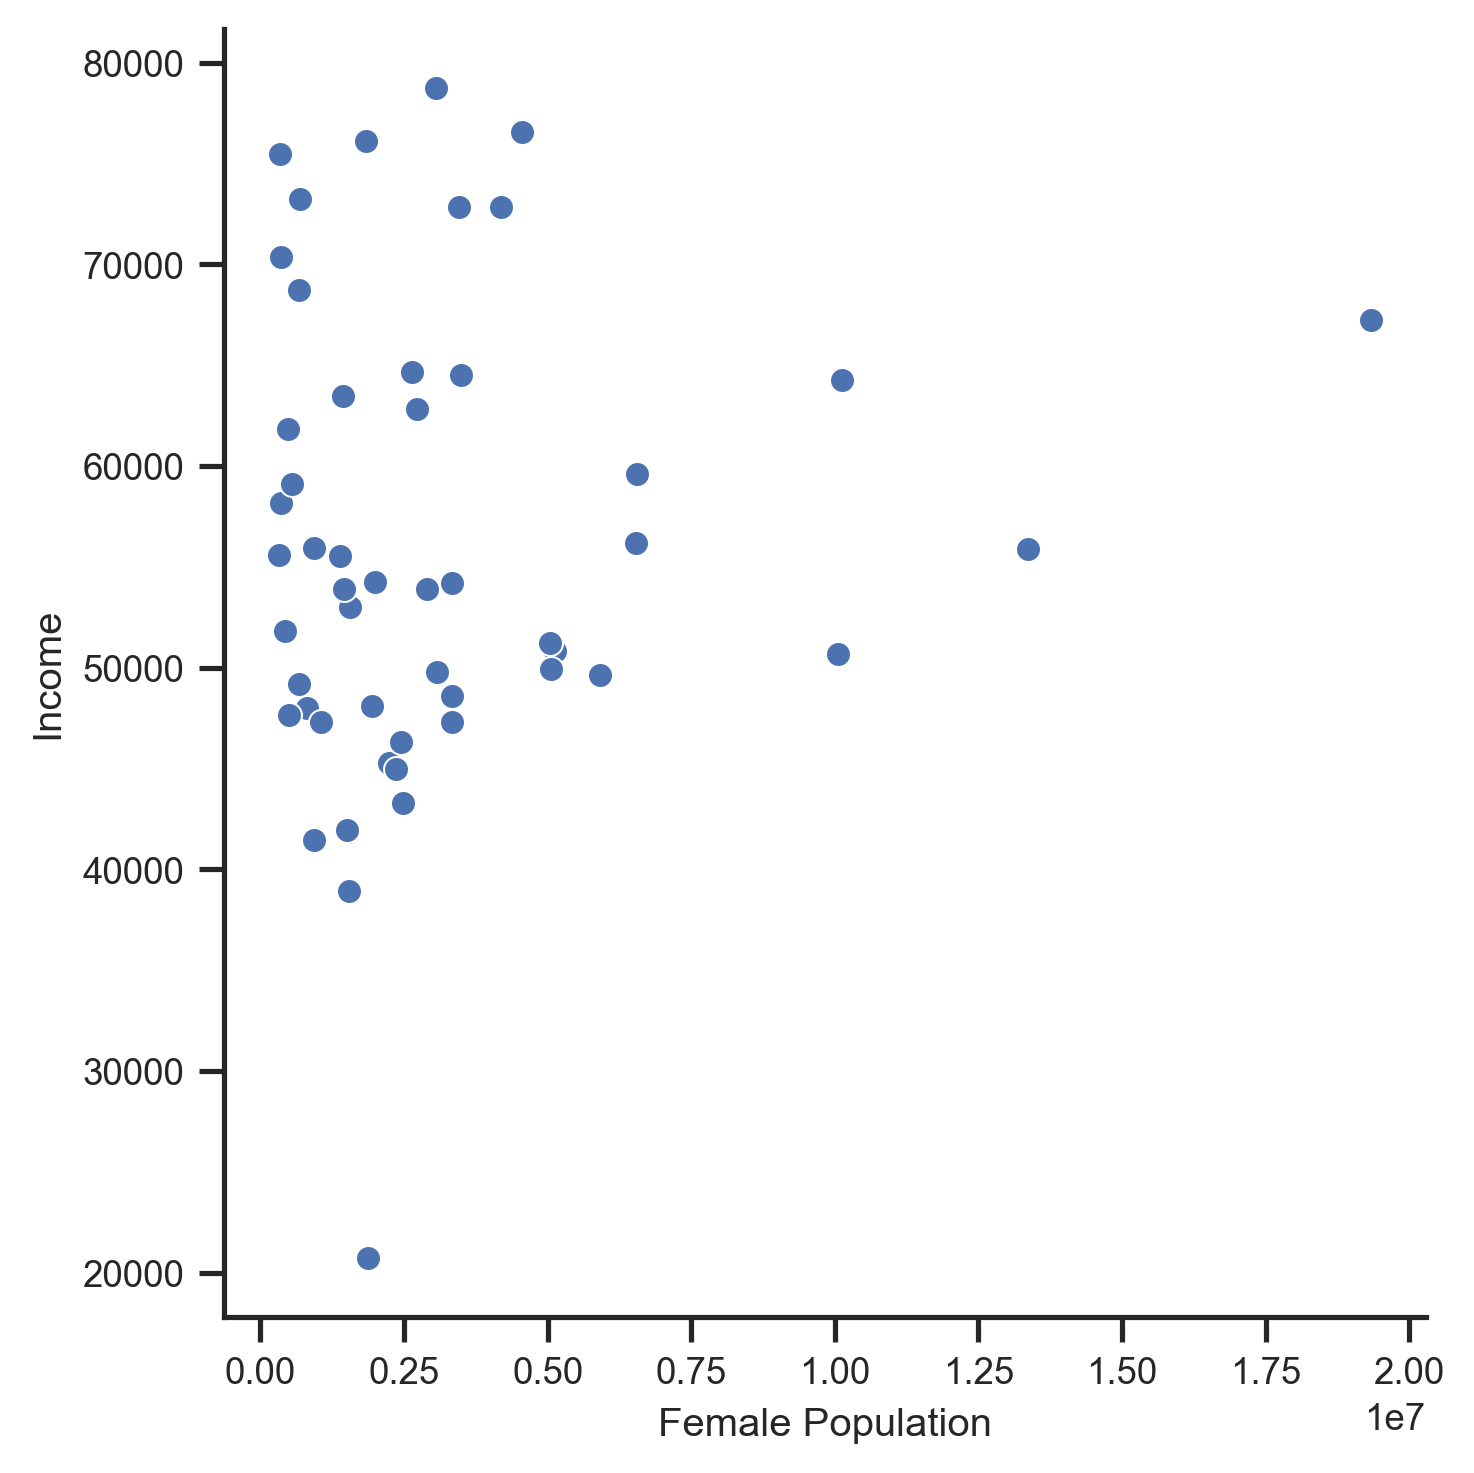

In [117]:
sns.set(rc={'figure.dpi':300, 'savefig.dpi':300})
sns.set_theme()
sns.set_context('notebook', font_scale=0.8)
sns.set_style('ticks')
plot=sns.relplot(x='FemalePop', y='Income', data=combinedData)
#labeling the axis
plot.set_axis_labels("Female Population", "Income")

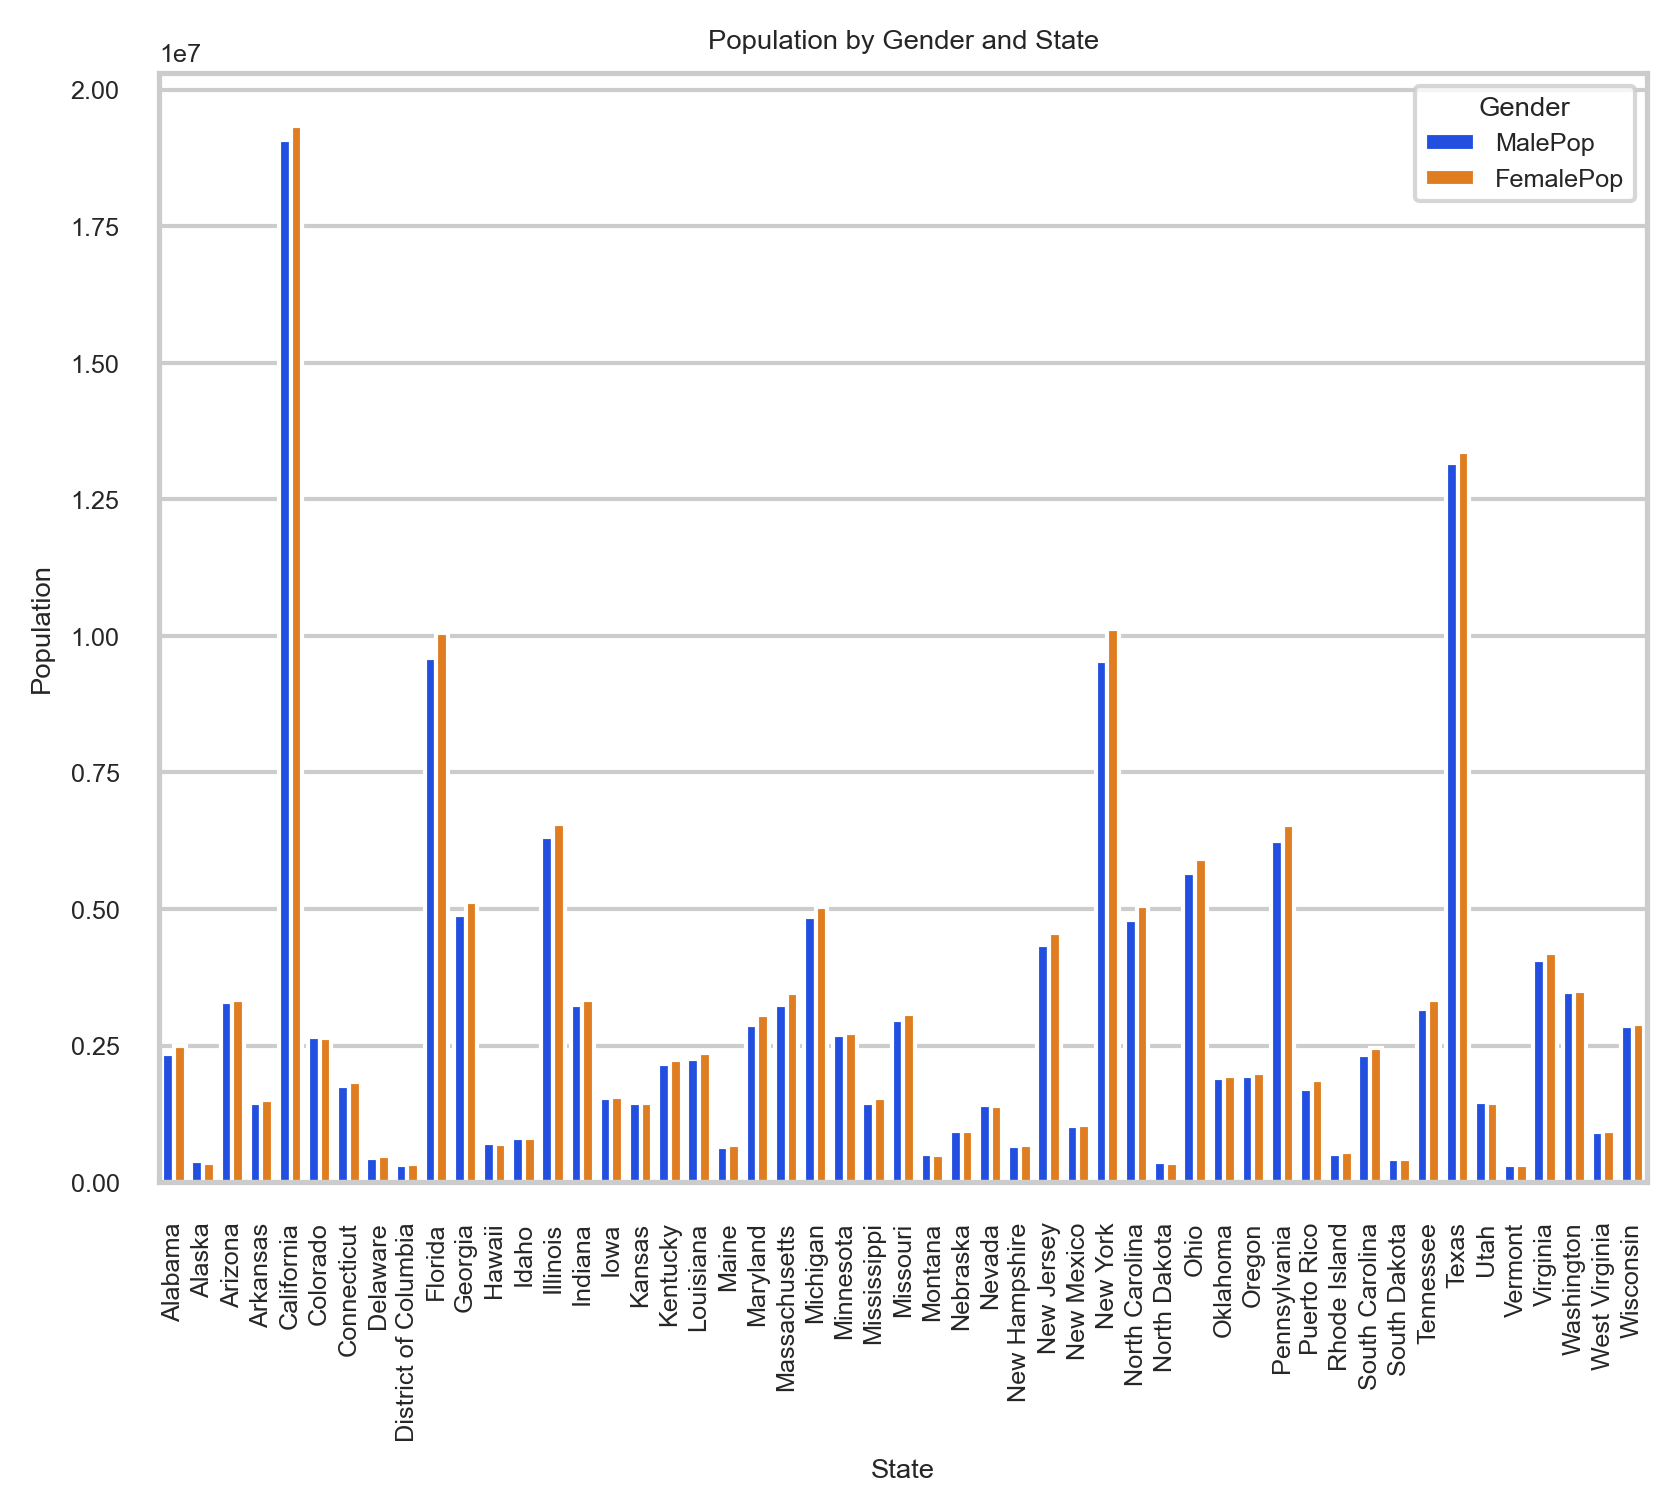

In [85]:
data = sns.load_dataset('tips')

state_gender_data = combinedData.groupby(
    ['State'])[['MalePop', 'FemalePop']].sum().reset_index()

state_gender_data_melted = pd.melt(state_gender_data, id_vars=['State'], value_vars=[
                                   'MalePop', 'FemalePop'], var_name='Gender', value_name='Population')

sns.set(style="whitegrid")
sns.set_context('notebook', font_scale=0.55)
ax = sns.barplot(x='State', y='Population', hue='Gender',
                 data=state_gender_data_melted, palette='bright')

ax.set(xlabel='State', ylabel='Population',
       title='Population by Gender and State')
plt.xticks(rotation=90)

plt.show()


<Axes: xlabel='Hispanic', ylabel='State'>

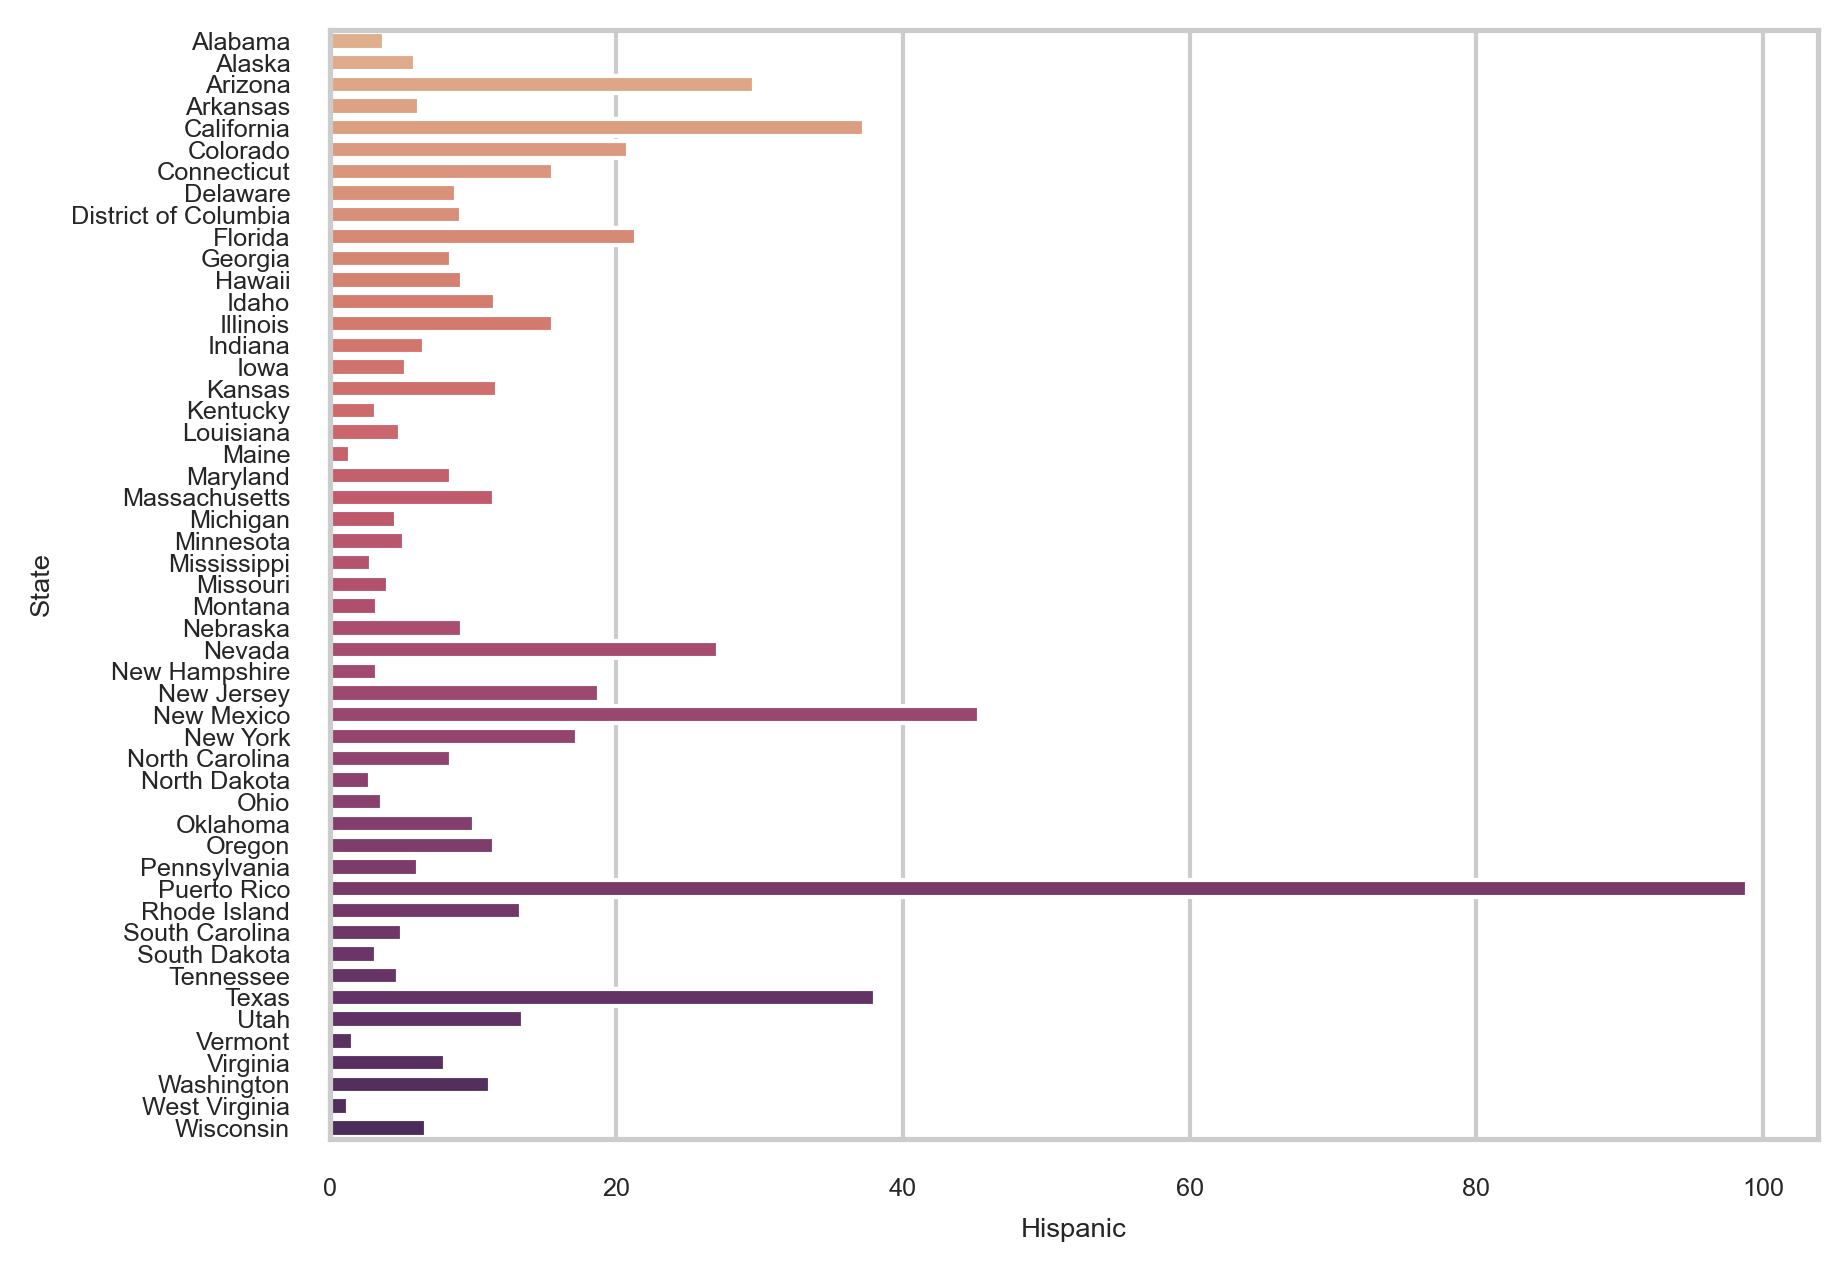

In [81]:
sns.set_context('notebook', font_scale=0.55)
sns.barplot(x='Hispanic', y='State', data=combinedData, palette='flare')

<Axes: xlabel='White', ylabel='State'>

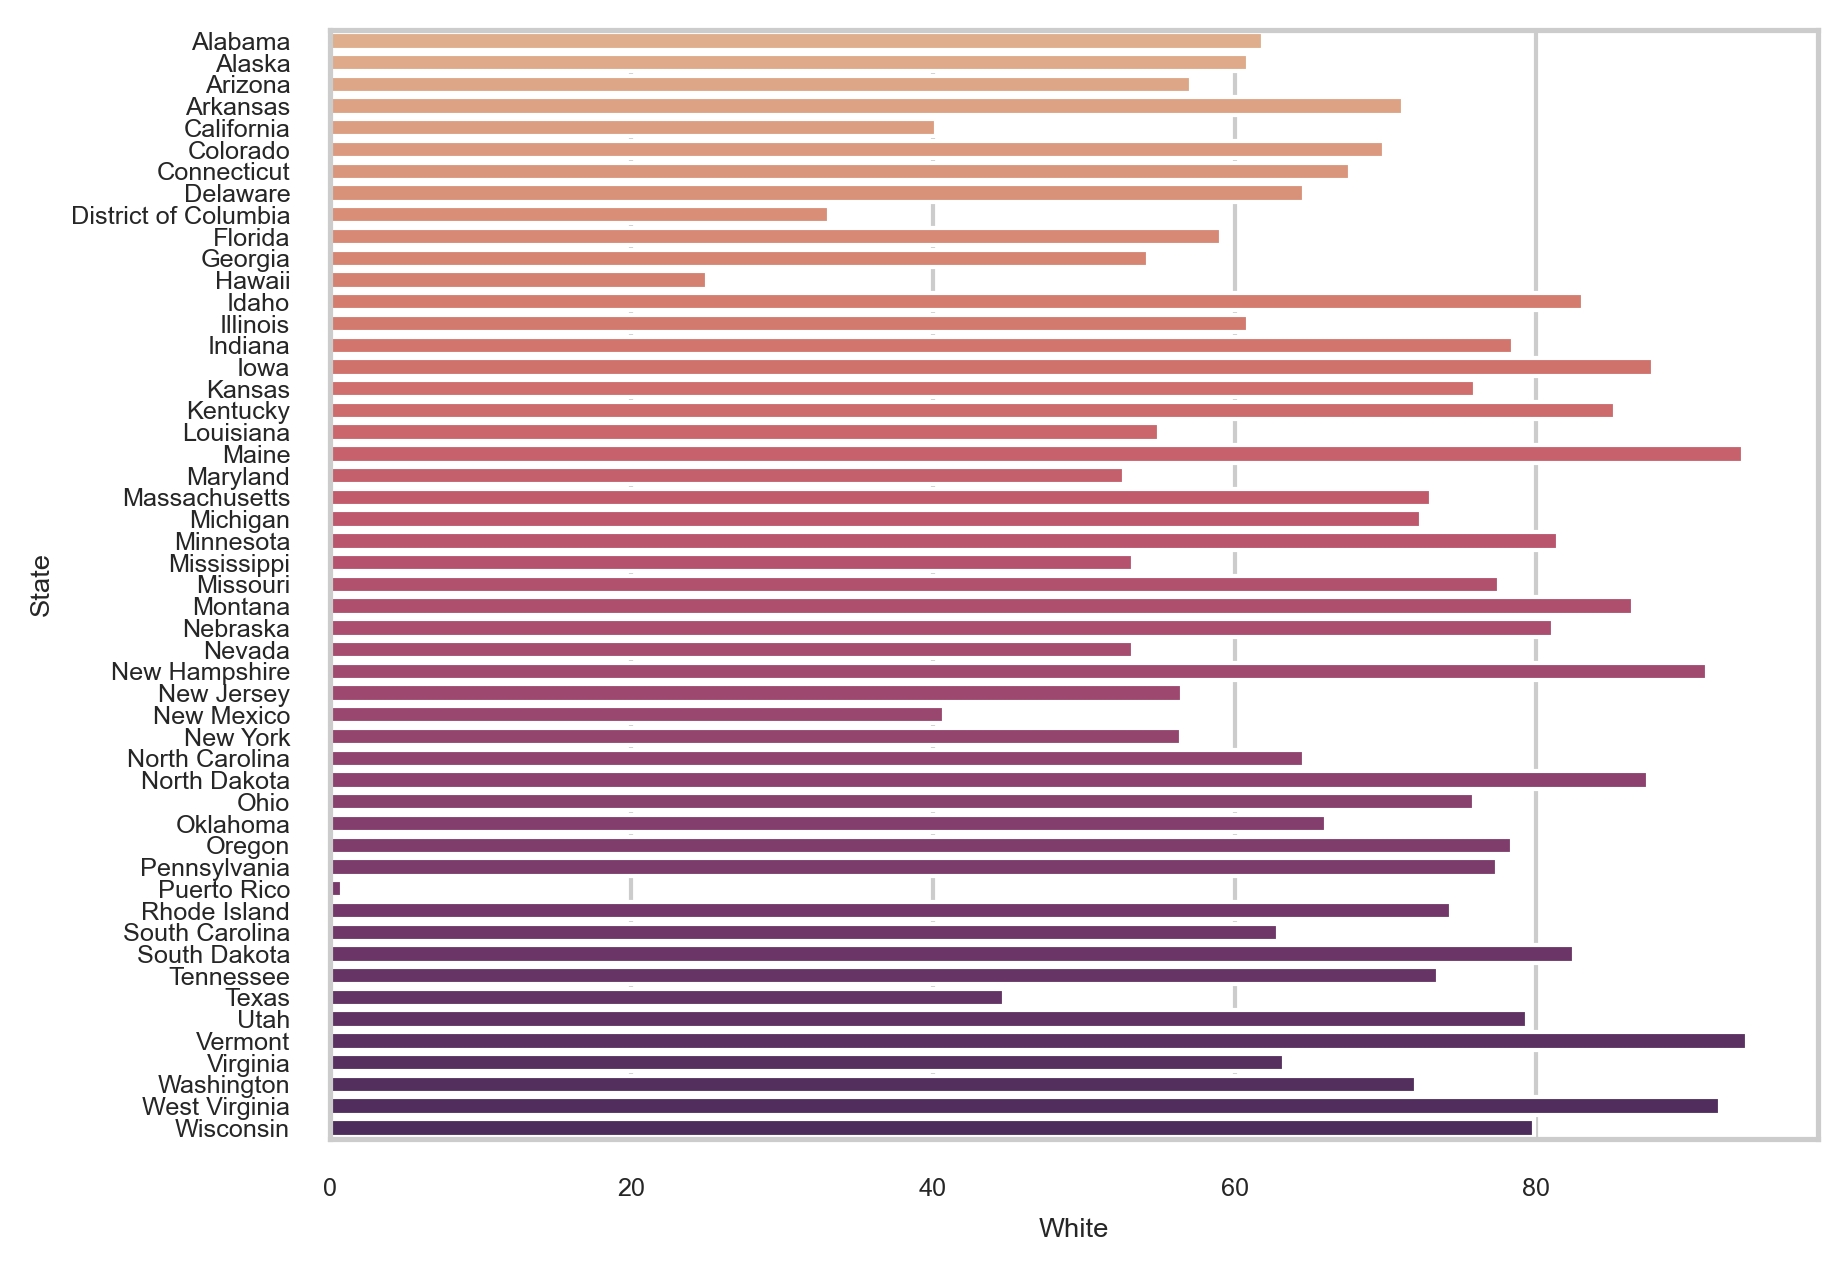

In [75]:
sns.barplot(x='White', y='State', data=combinedData, palette='flare')

<Axes: xlabel='Black', ylabel='State'>

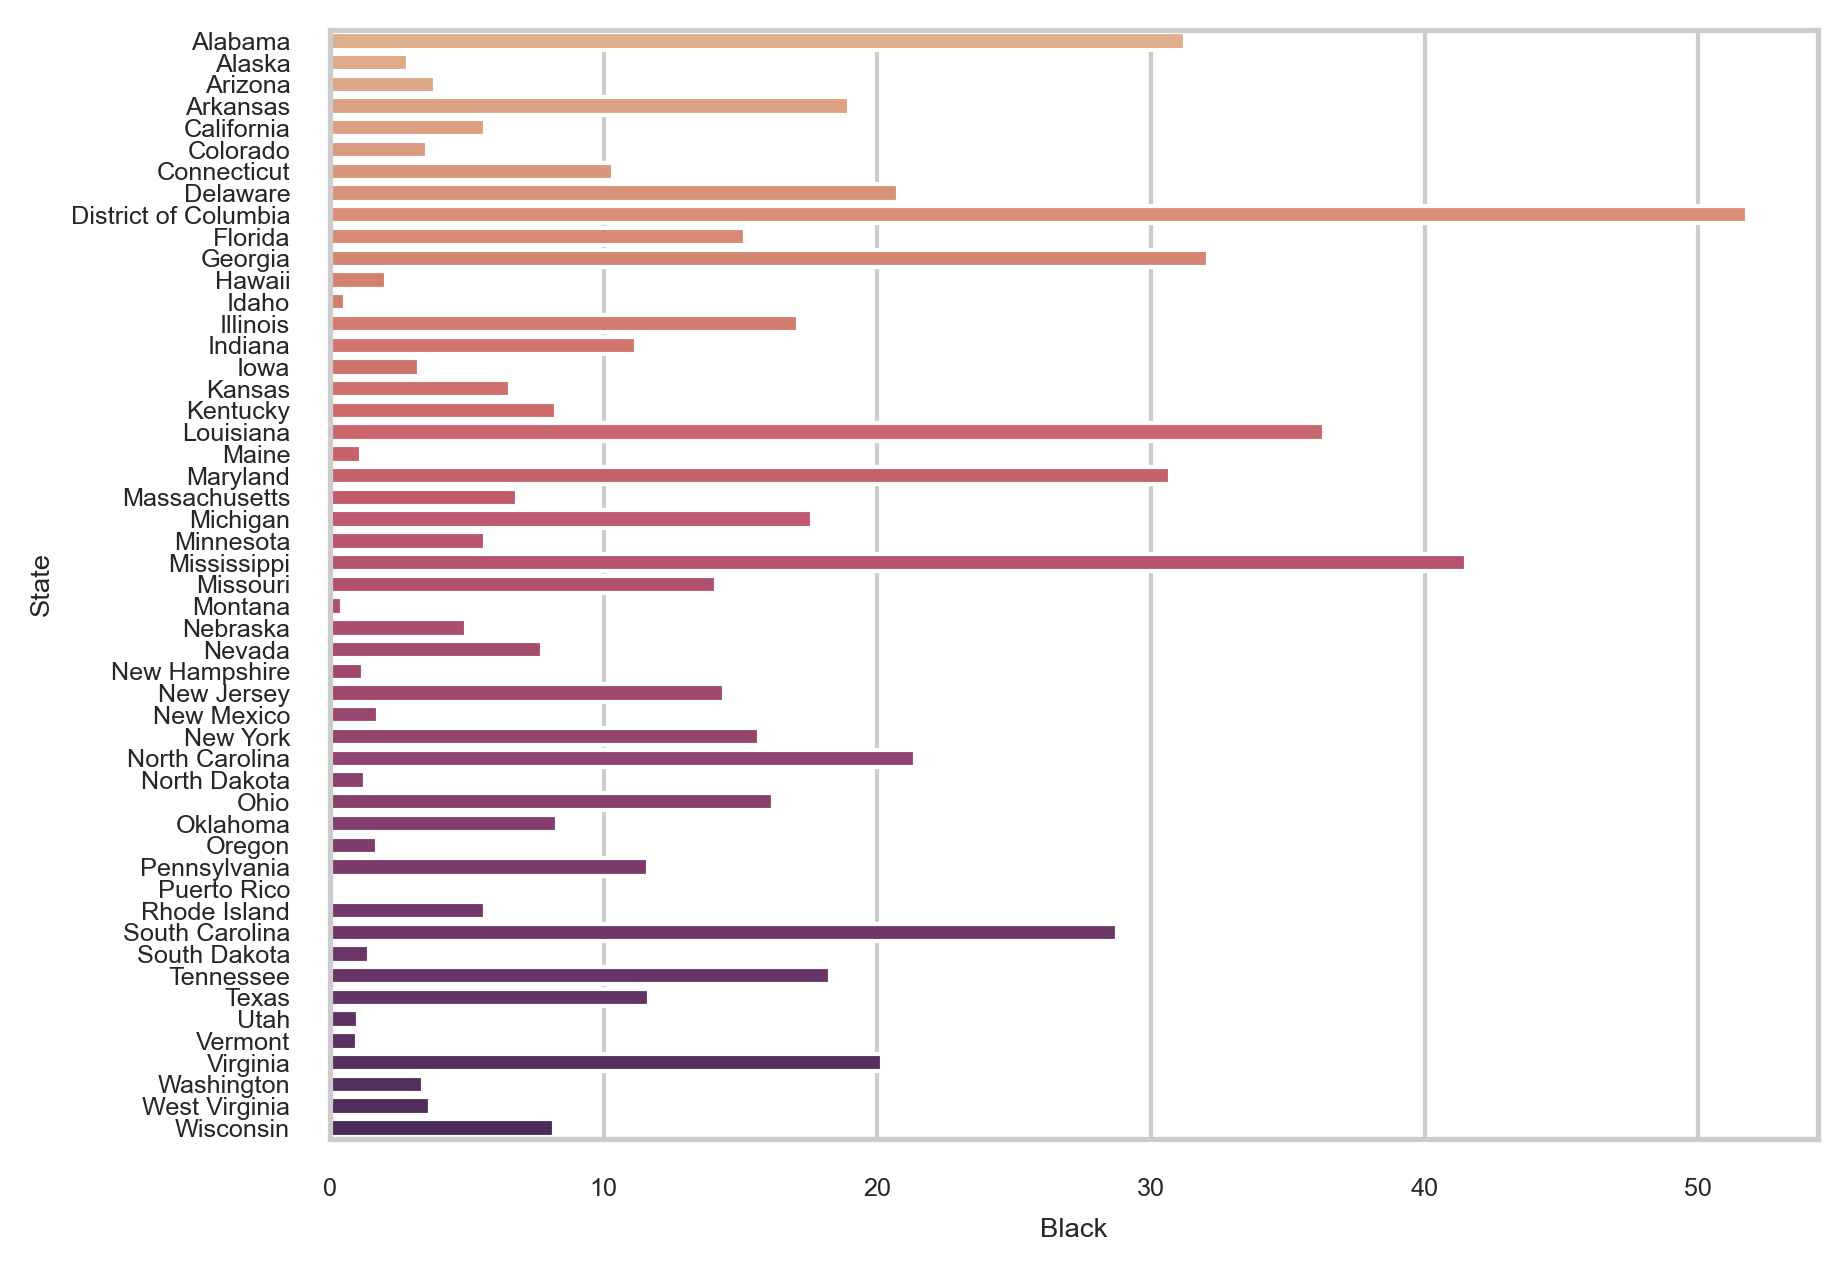

In [76]:
sns.barplot(x='Black', y='State', data=combinedData, palette='flare')

<Axes: xlabel='Native', ylabel='State'>

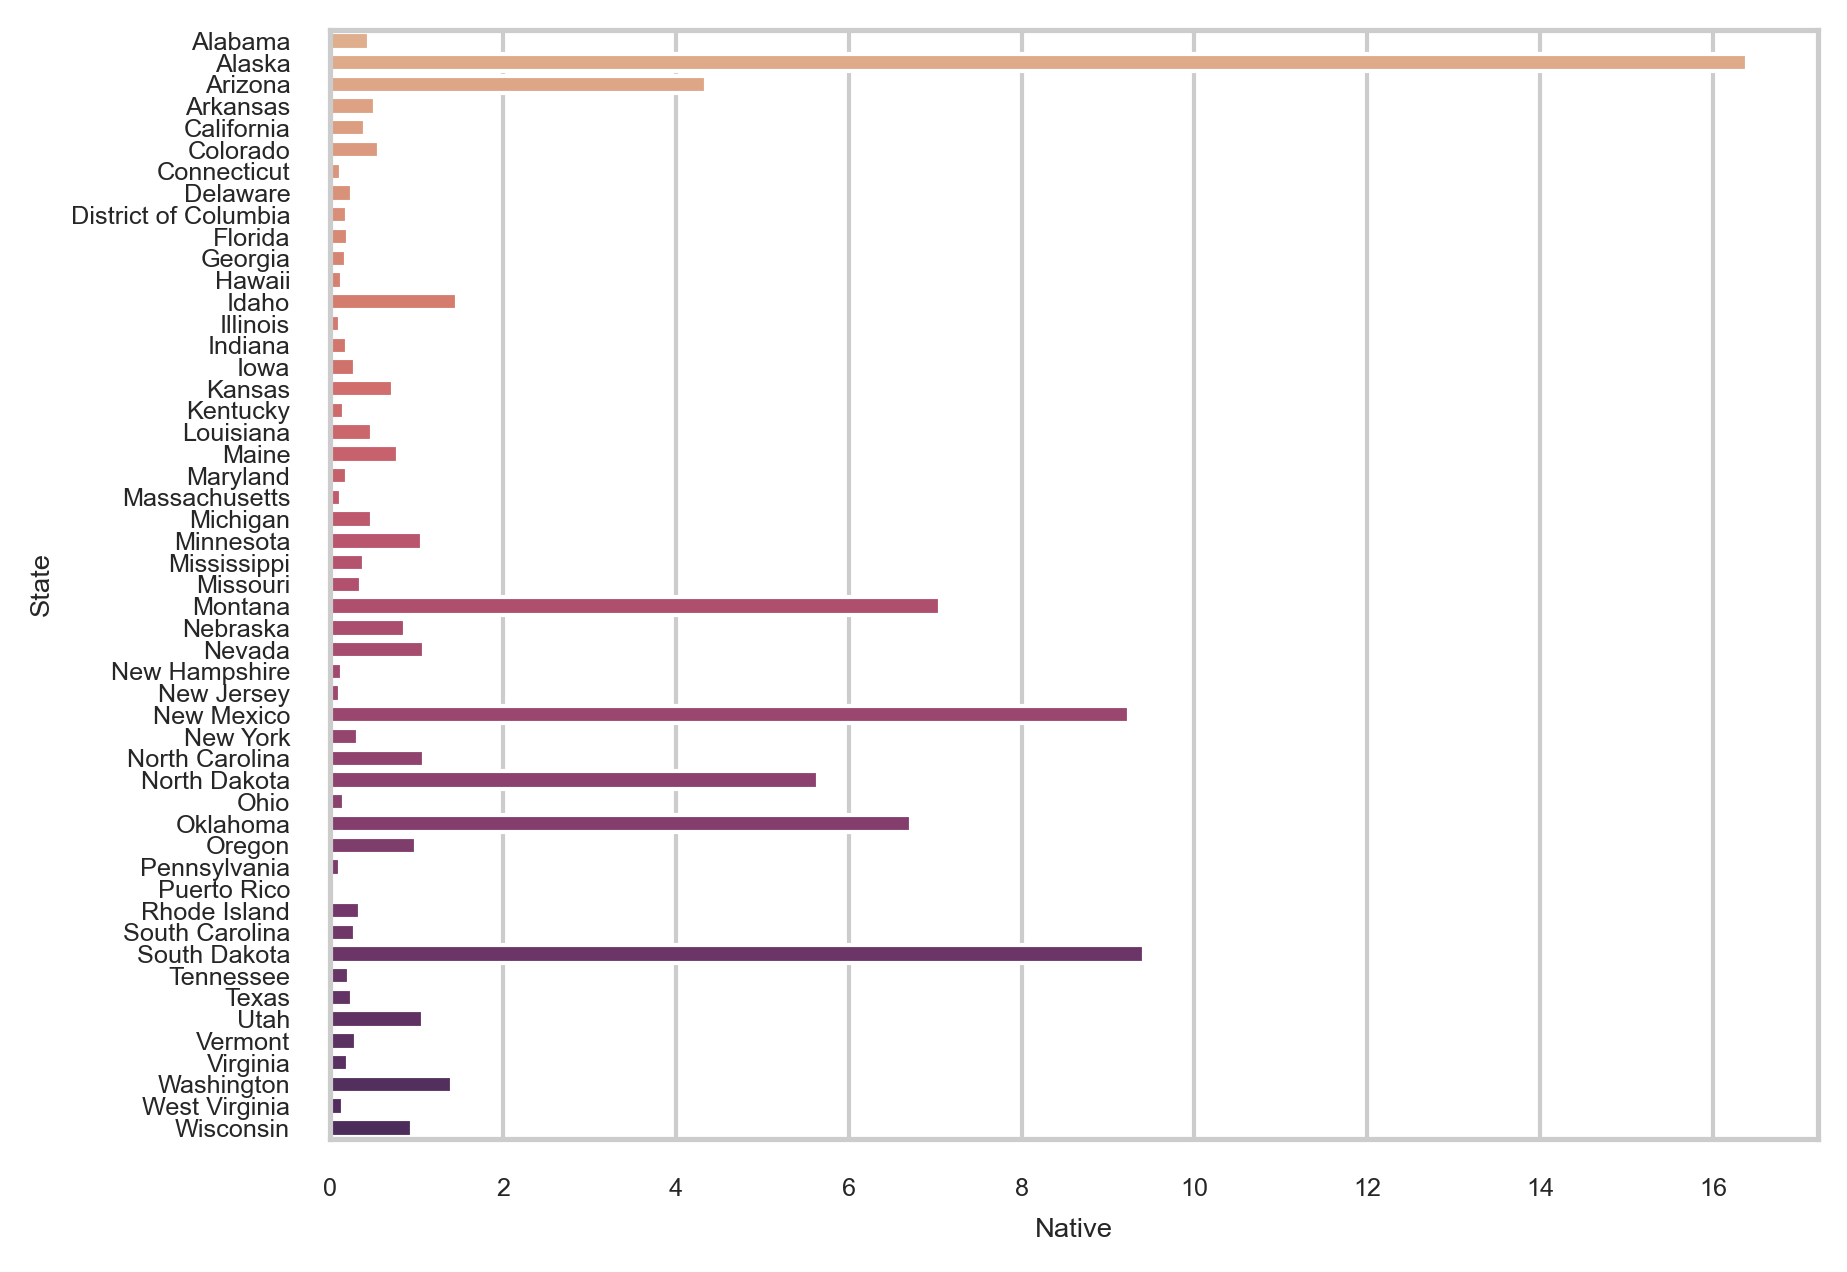

In [77]:
sns.barplot(x='Native', y='State', data=combinedData, palette='flare')

<Axes: xlabel='Asian', ylabel='State'>

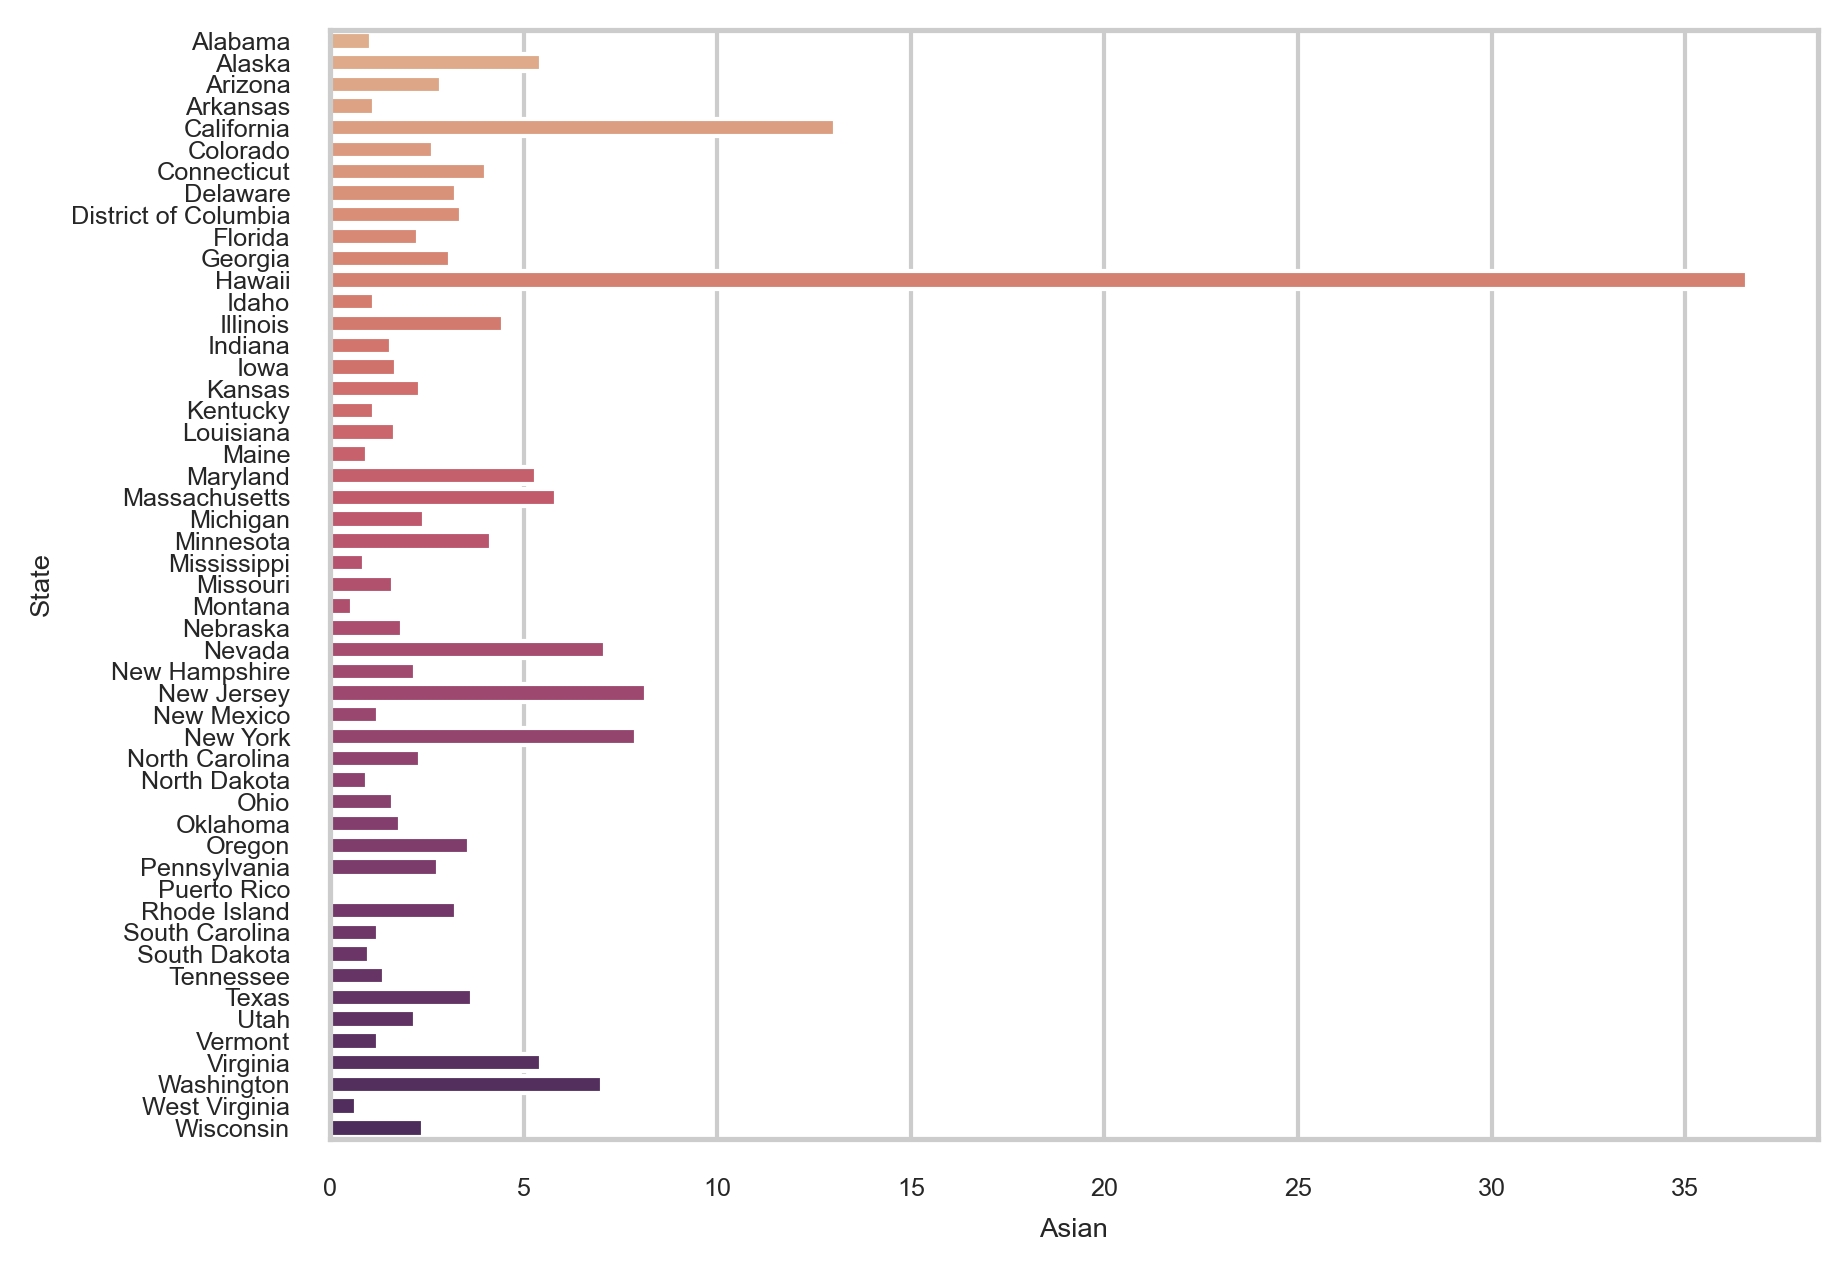

In [78]:
sns.barplot(x='Asian', y='State', data=combinedData, palette='flare')

<Axes: xlabel='Pacific', ylabel='State'>

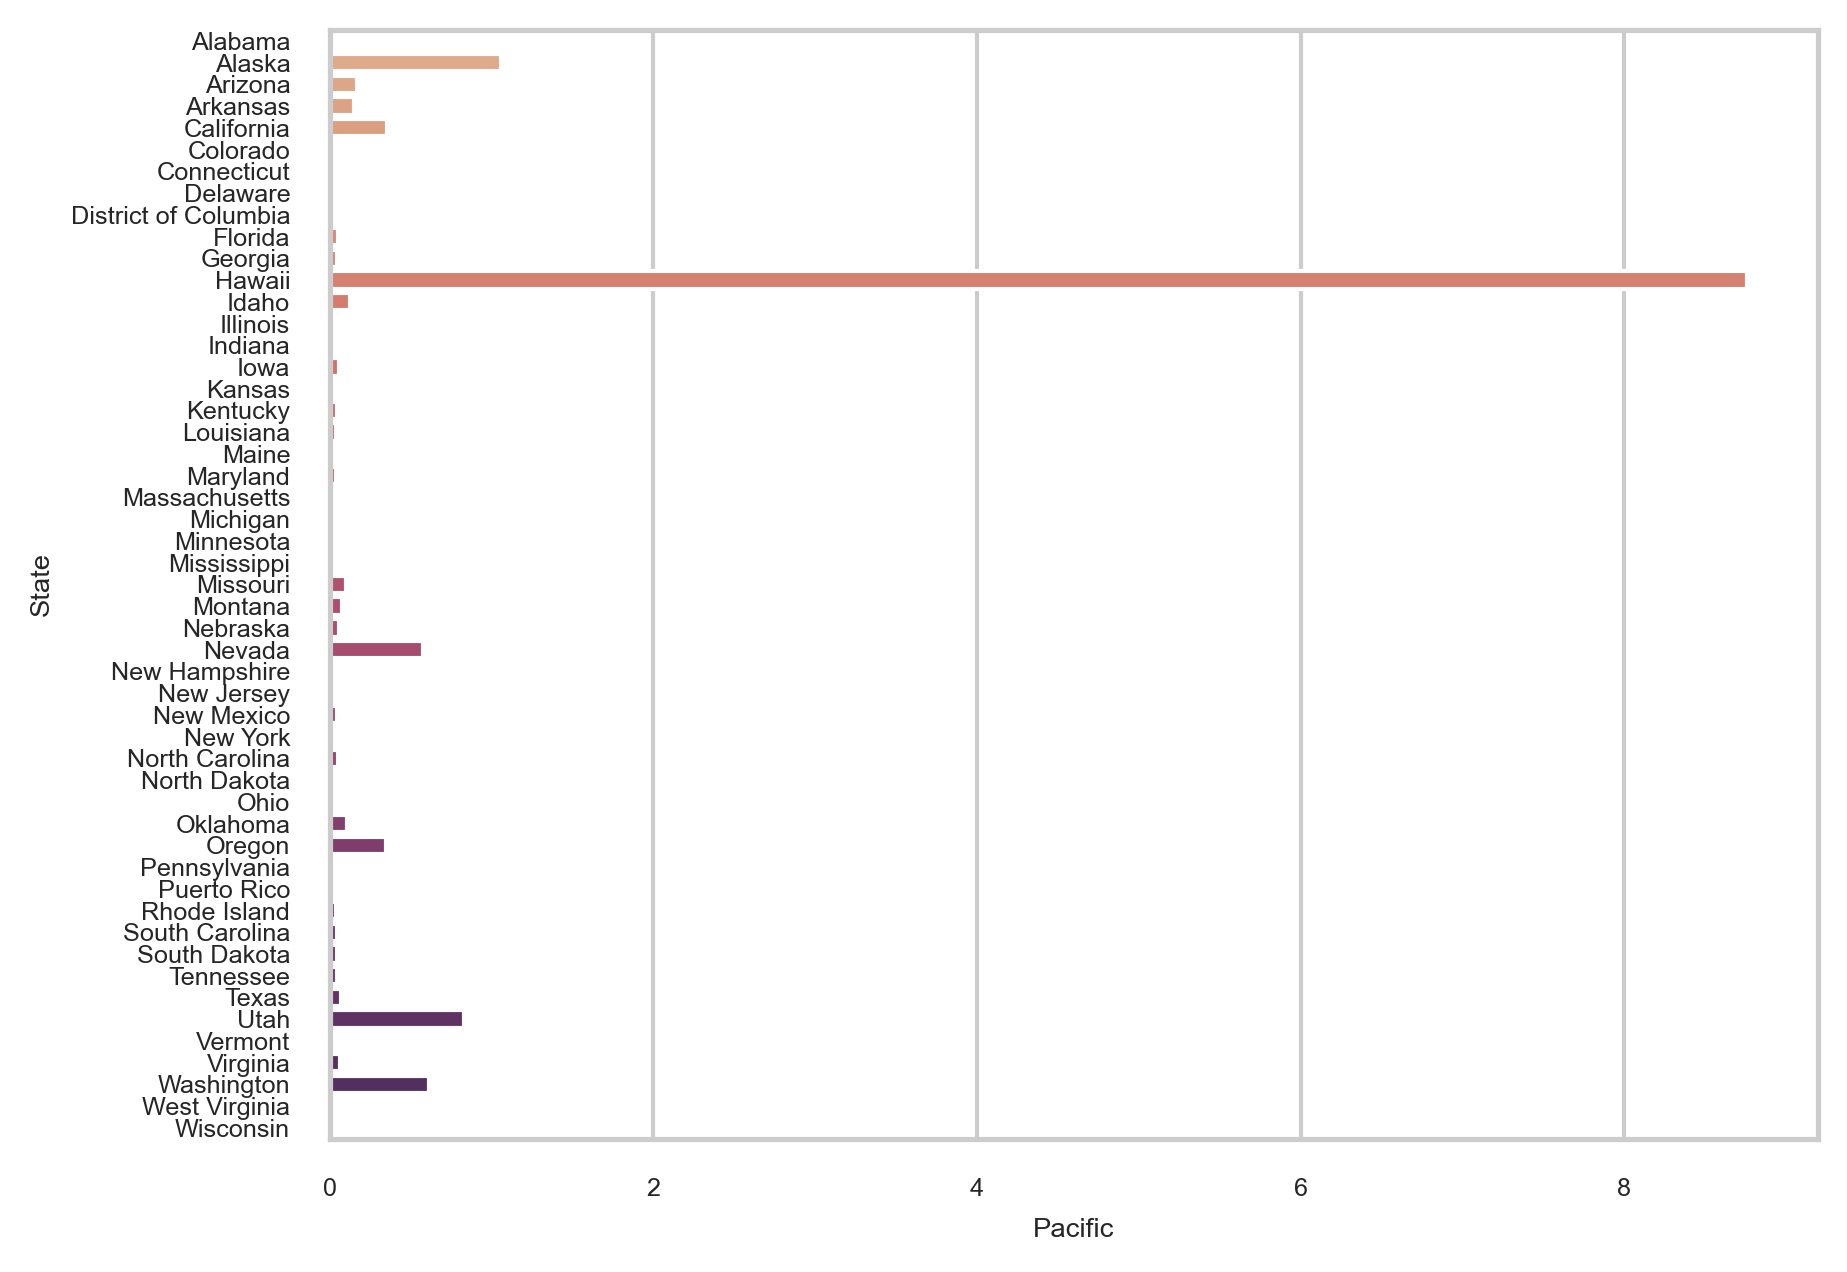

In [110]:
sns.barplot(x='Pacific', y='State', data=combinedData, palette='flare')

In [82]:
combinedData.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329


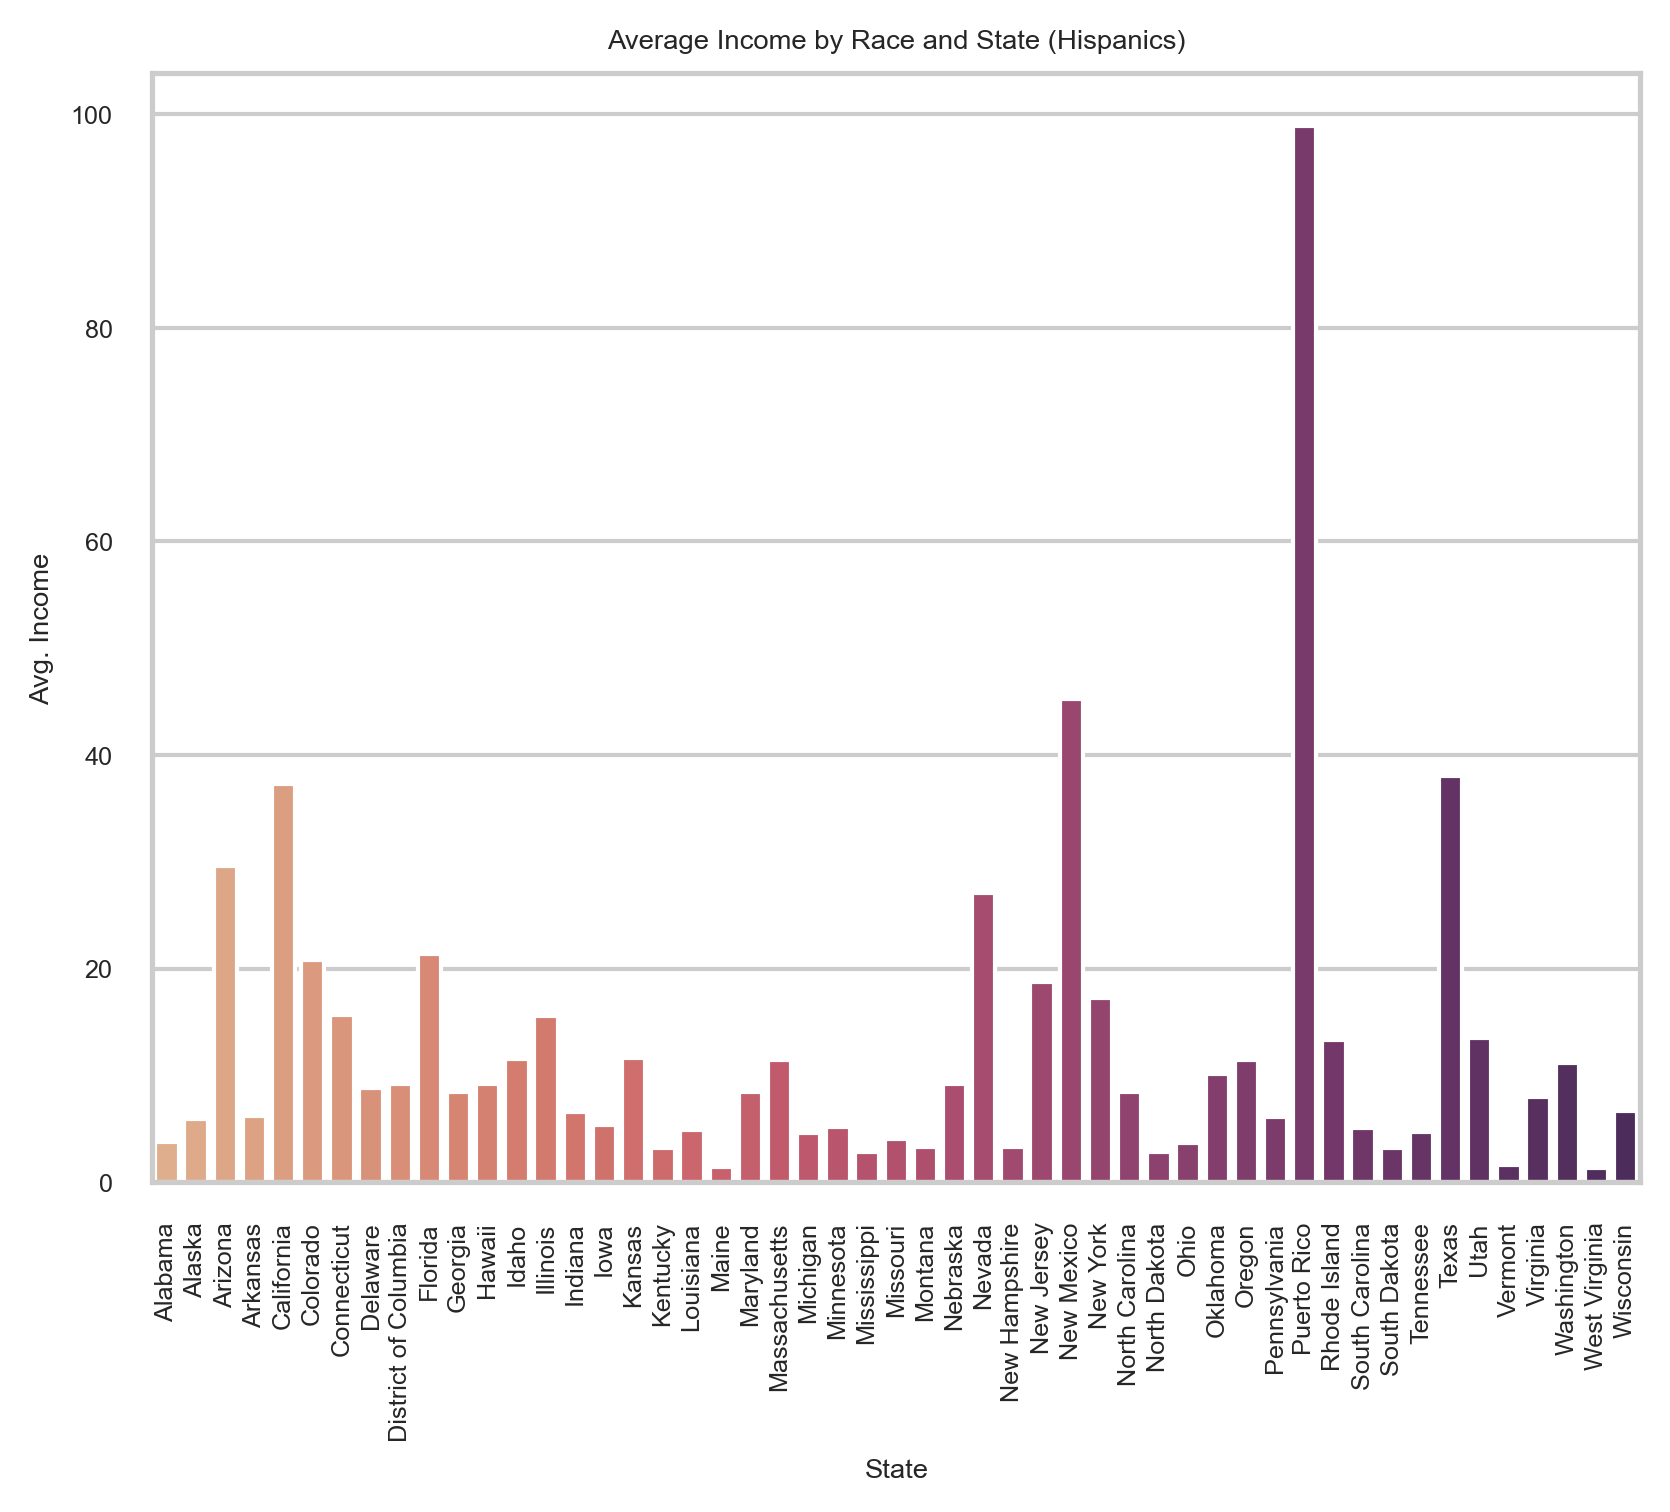

In [111]:
grouped_data = combinedData.groupby('State')[
    ['Hispanic', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'Hispanic'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (Hispanics)')
plt.xticks(rotation=90)

plt.show()


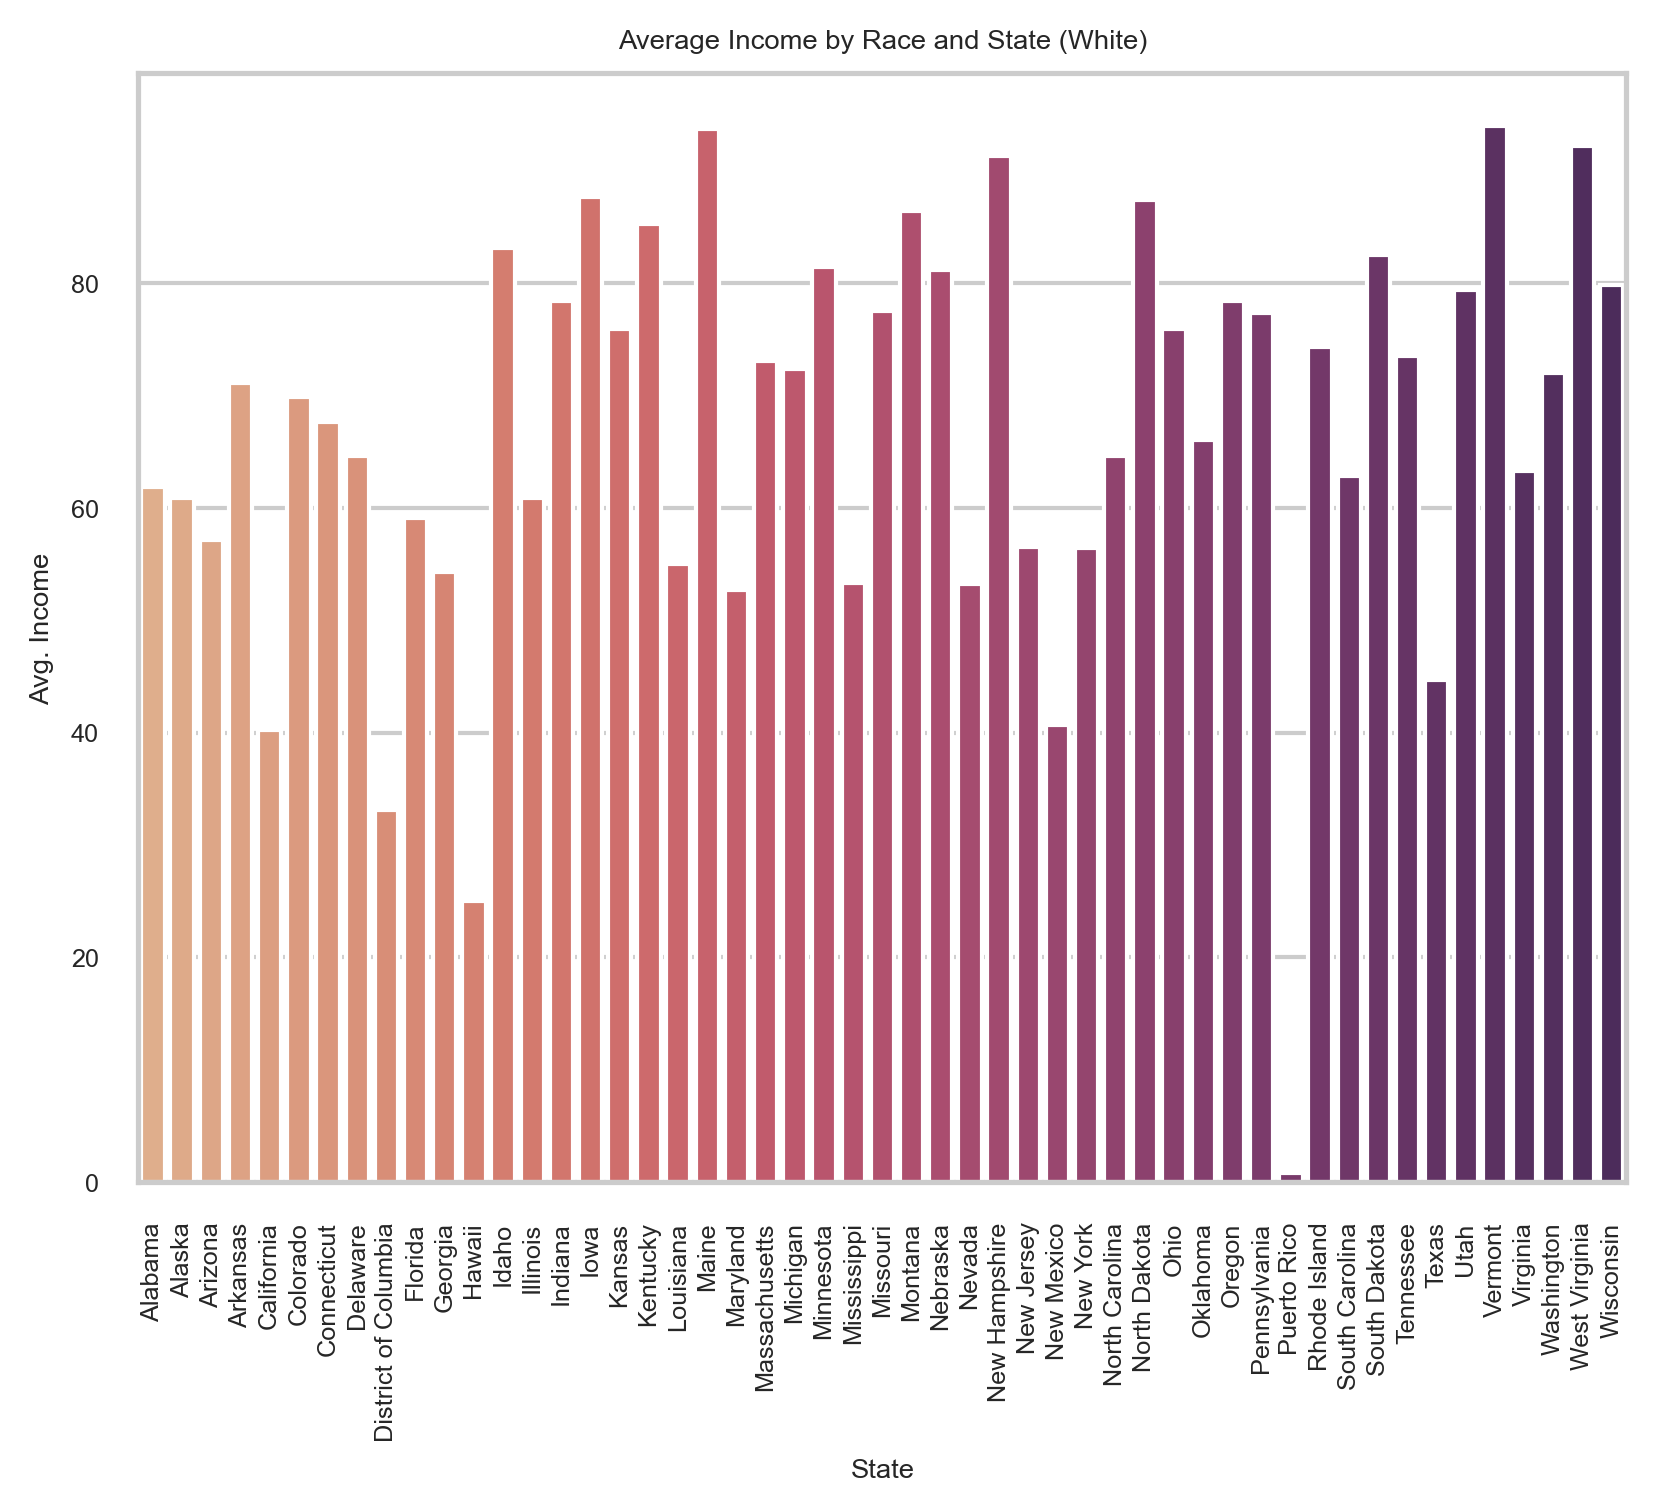

In [112]:
grouped_data = combinedData.groupby('State')[
    ['White', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'White'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (White)')
plt.xticks(rotation=90)

plt.show()

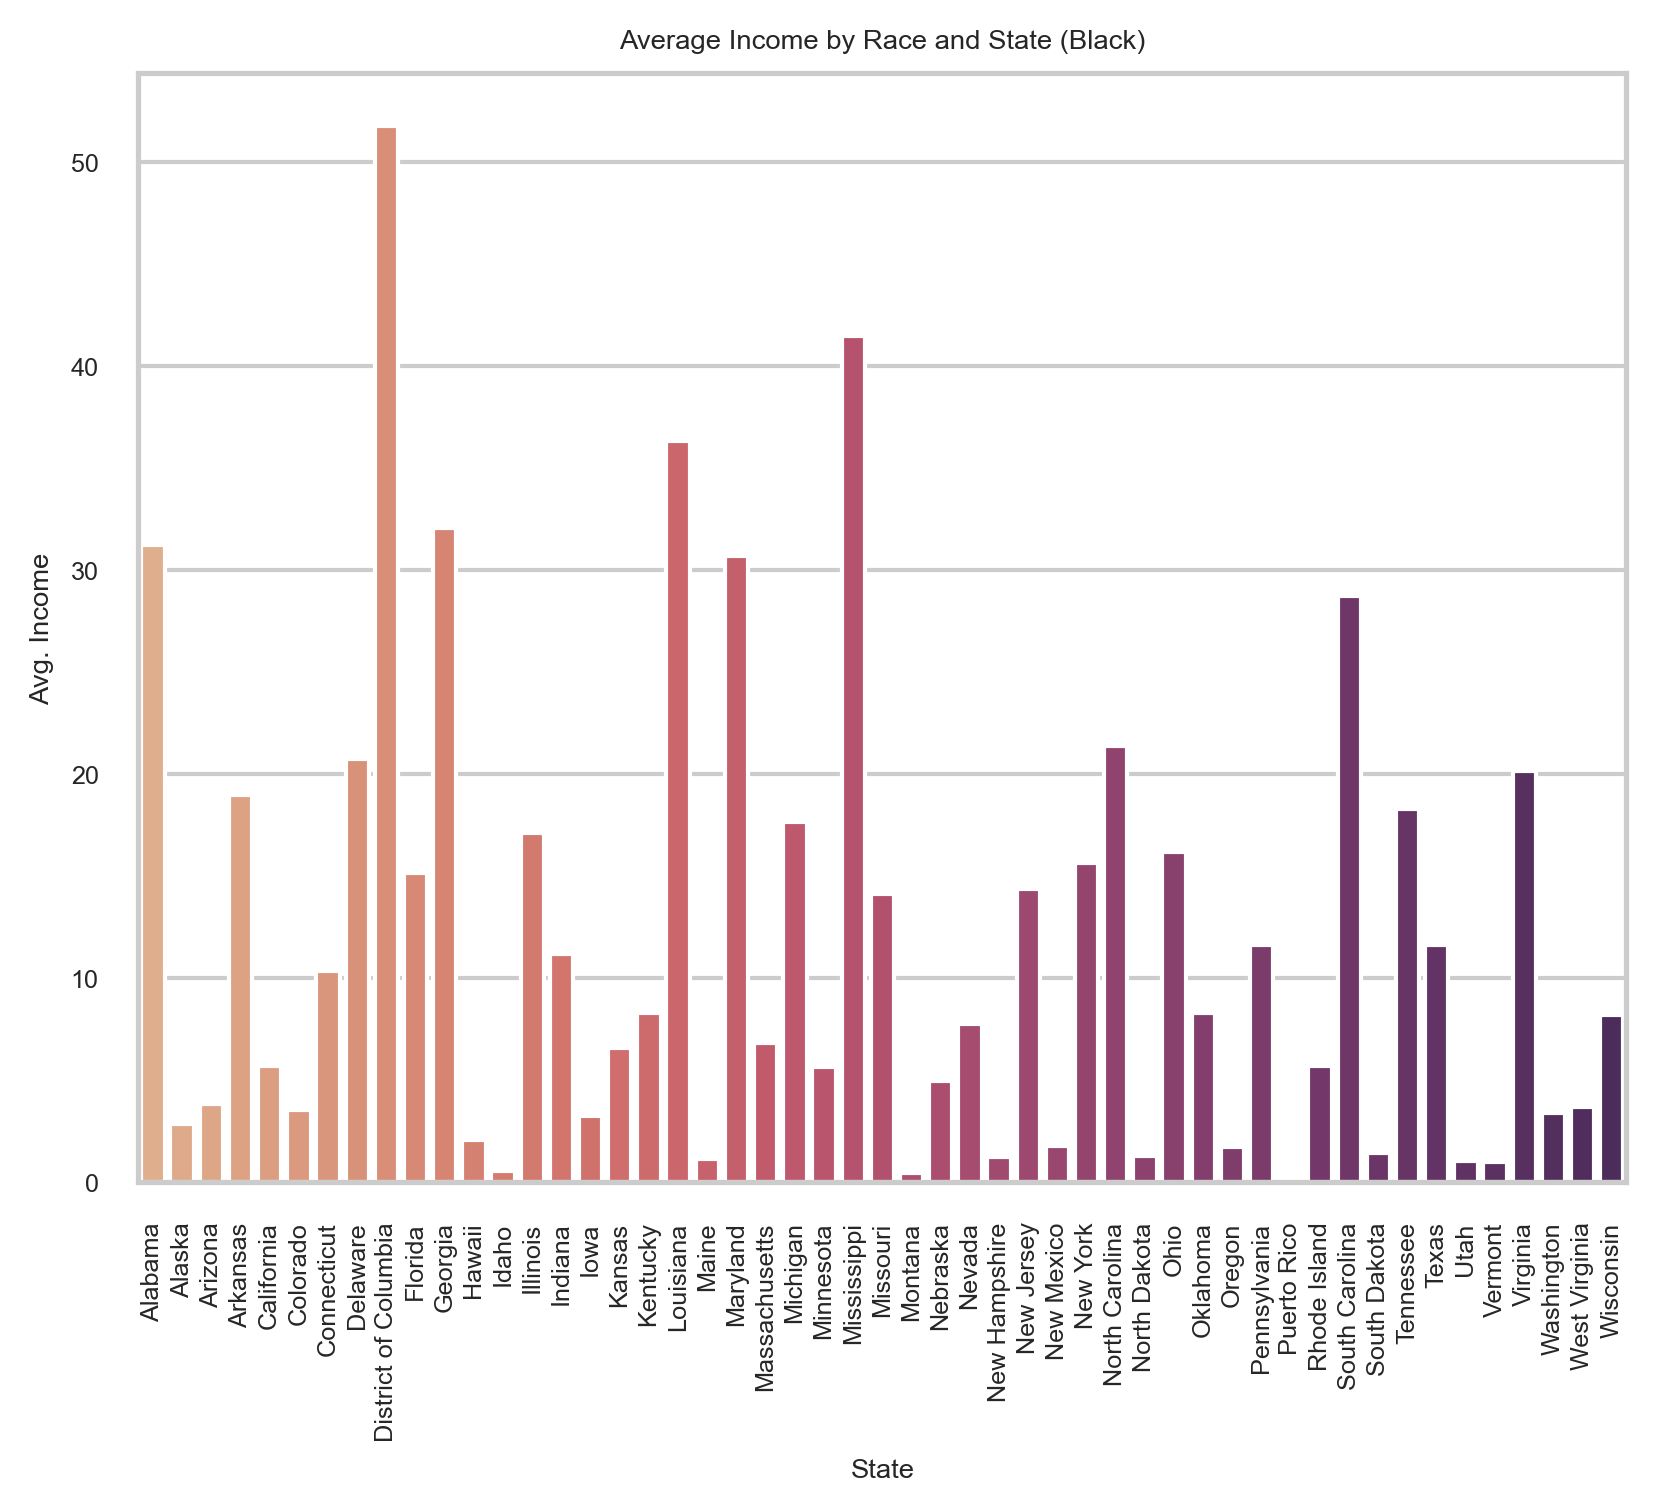

In [113]:
grouped_data = combinedData.groupby('State')[
    ['Black', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'Black'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (Black)')
plt.xticks(rotation=90)

plt.show()

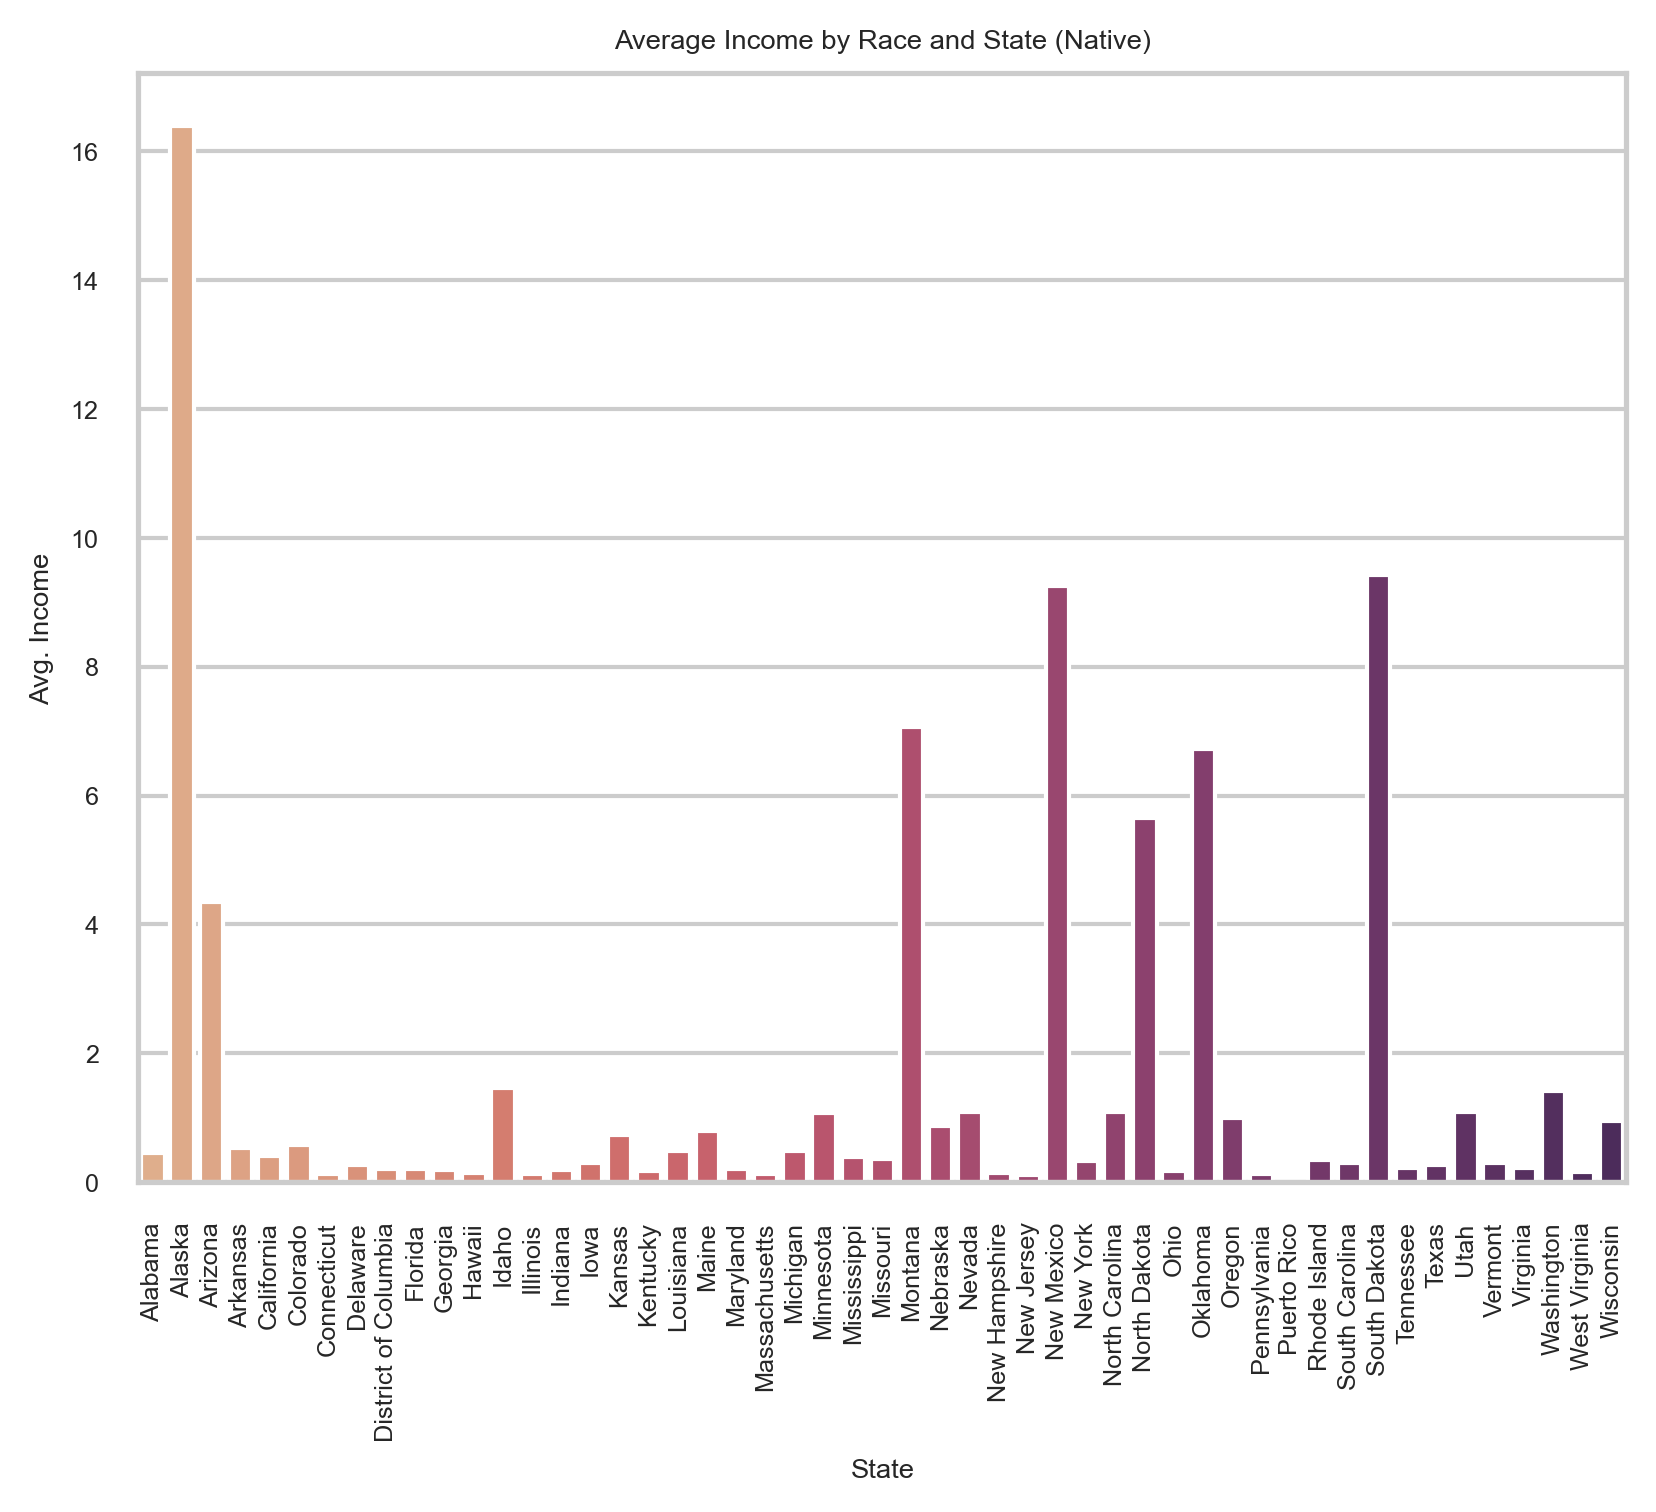

In [114]:
grouped_data = combinedData.groupby('State')[
    ['Native', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'Native'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (Native)')
plt.xticks(rotation=90)

plt.show()

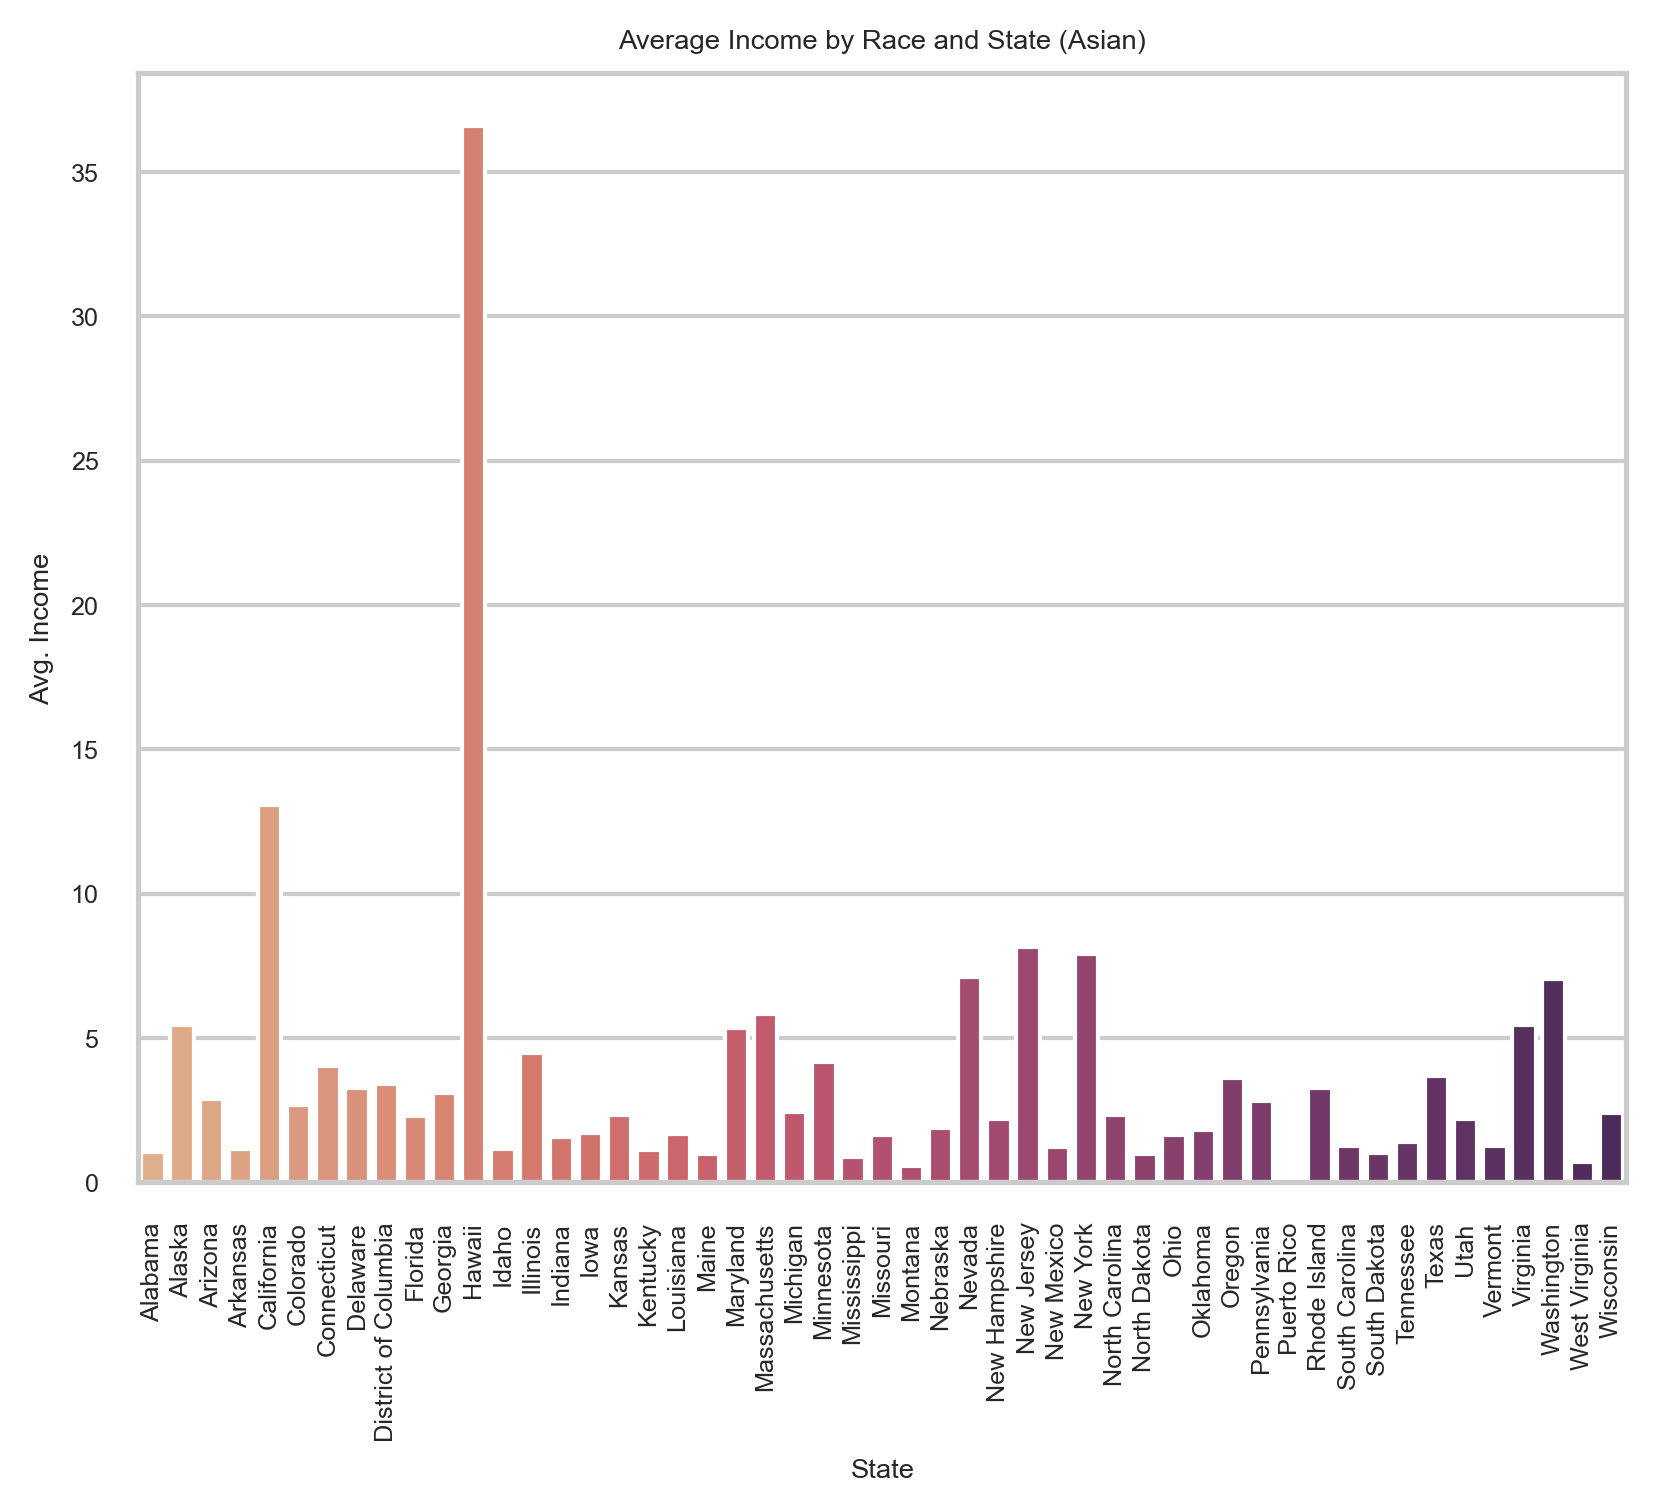

In [101]:
grouped_data = combinedData.groupby('State')[
    ['Asian', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'Asian'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (Asian)')
plt.xticks(rotation=90)

plt.show()

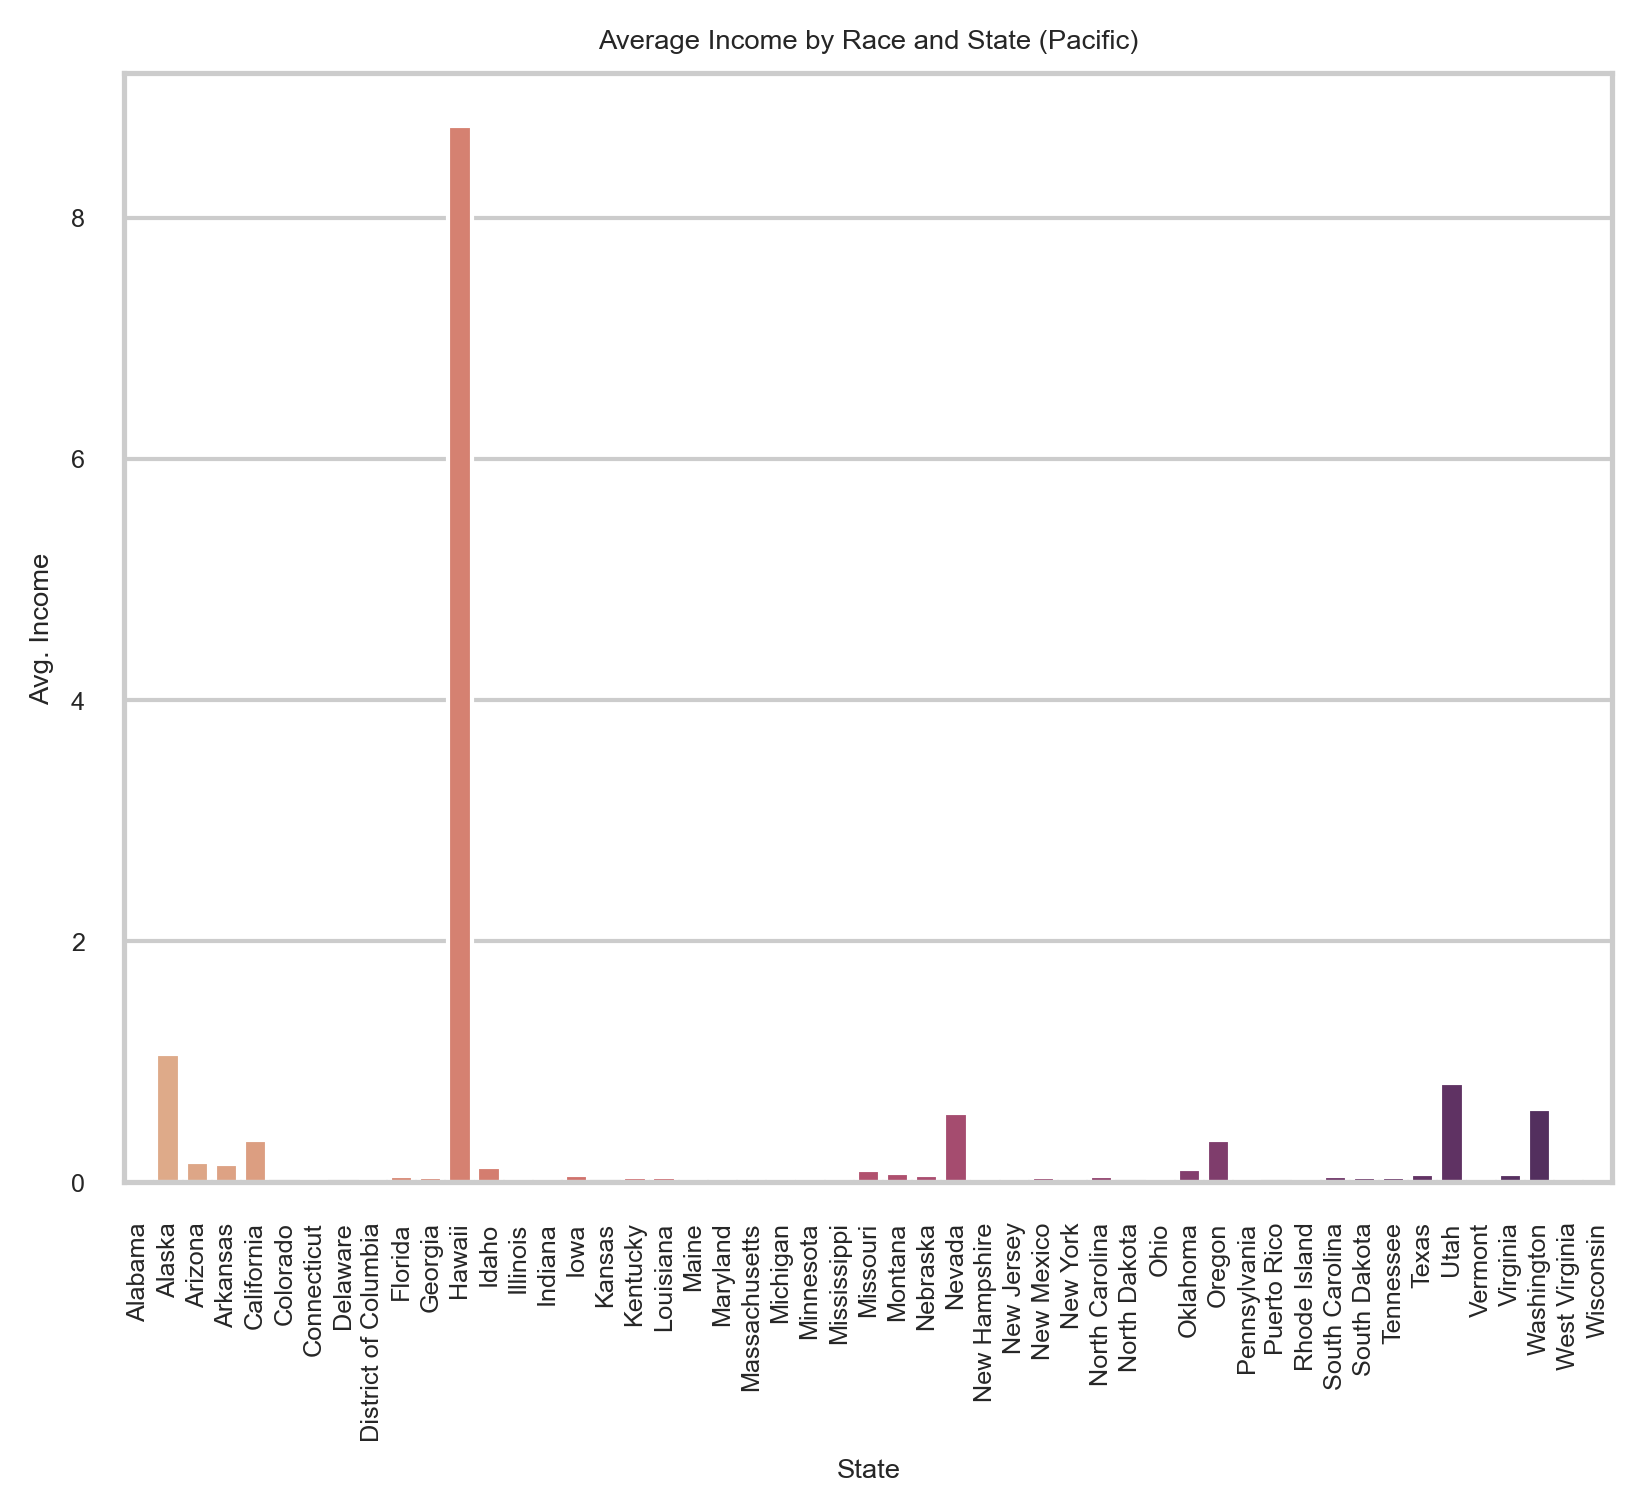

In [115]:
grouped_data = combinedData.groupby('State')[
    ['Pacific', 'Income']].mean().reset_index()

melted_data = pd.melt(grouped_data, id_vars=['State'], value_vars=[
                      'Pacific'], var_name='Race', value_name='AvgIncome')

sns.set_style("whitegrid")
ax=sns.barplot(x="State", y="AvgIncome", data=melted_data, palette='flare')
ax.set(xlabel='State', ylabel='Avg. Income',
       title='Average Income by Race and State (Pacific)')
plt.xticks(rotation=90)

plt.show()

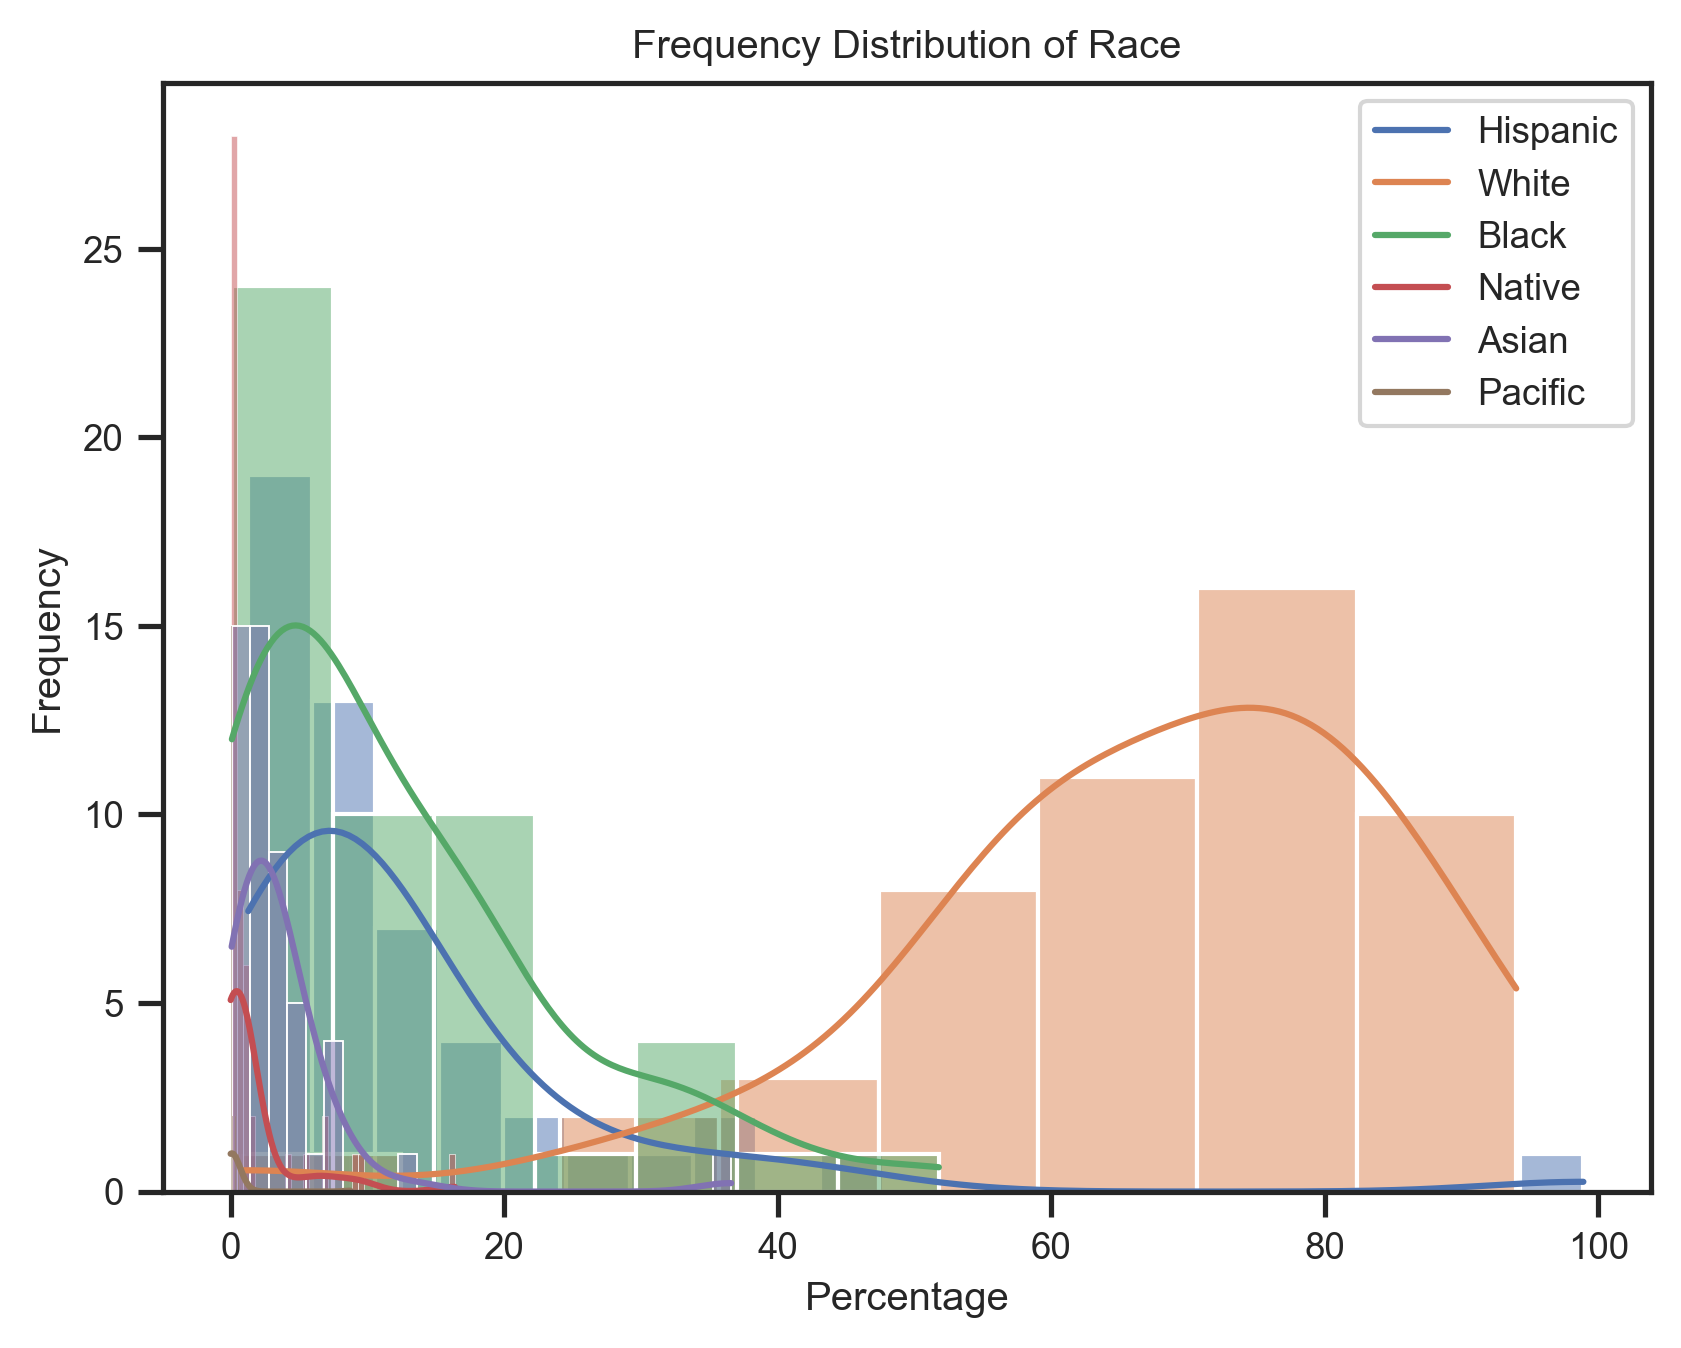

In [120]:
race_data = combinedData[['Hispanic', 'White',
                          'Black', 'Native', 'Asian', 'Pacific']]

sns.histplot(data=race_data, x='Hispanic', kde=True)
sns.histplot(data=race_data, x='White', kde=True)
sns.histplot(data=race_data, x='Black', kde=True)
sns.histplot(data=race_data, x='Native', kde=True)
sns.histplot(data=race_data, x='Asian', kde=True)
sns.histplot(data=race_data, x='Pacific', kde=True)

plt.title('Frequency Distribution of Race')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.legend(labels=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'])